### **프로젝트 주제**
코로나로 인해 수요량이 높은 상품 3가지들을 예측 및 분석 후 이커머스와 네이버에 '코로나'키워드 검색 시 나오는 상품들과 비교 분석
### **프로젝트 기간**
##### 21/12/27 - 21/12/31 
### **프로젝트 구성원**
- 팀 : 영양미
- 조장: 김미나
- 조원: 양수미, 송인영


### **목차**
1. 주제 선정 및 계획 수립 과정
2. 데이터 설명
3. 데이터 분석 과정
4. 결론


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **1. 주제 선정 및 계획 수립 과정**

##### 아이디어는 2020년 코로나 확진자 급증으로 인한 홈쇼핑 마스크 대란. 계속 변화하는 코로나 규제로 인한 혼란 속에서도 지속적으로 잘 판매되는 상품은 무엇인가?에 대한 궁금증에서 출발하였습니다.
- 코로나 발생 현황
- 수요량이 높을 것이라 예상한 세 가지 상품(마스크, 비접촉 체온계, 자가진단키트)을 분석
- 이커머스 홈페이지와 네이버에 '코로나' 검색 시 실제로도 전부 수요가 높은지, 그렇지 않다면 원인은 무엇일지 분석

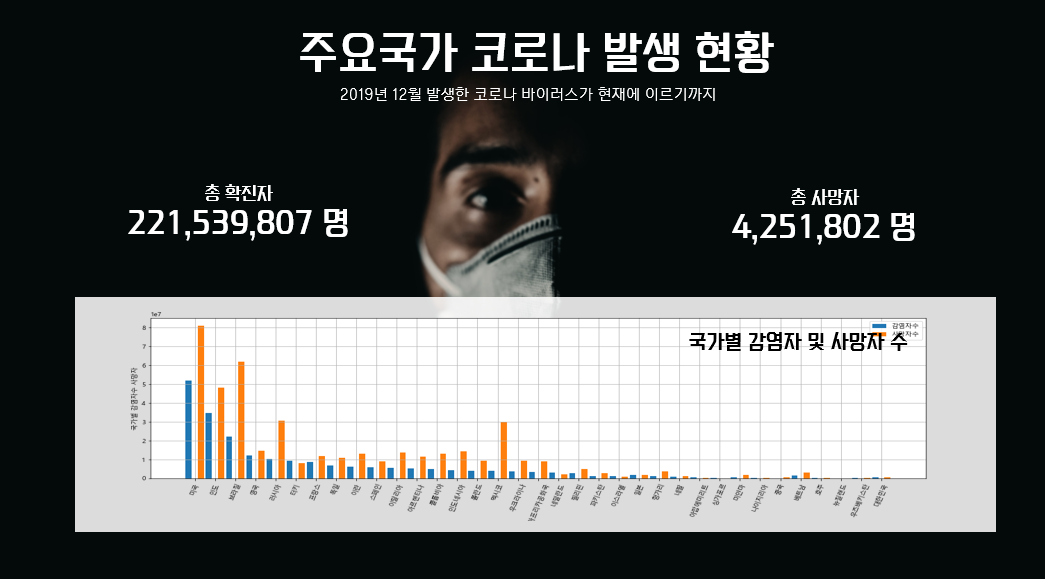

In [14]:
# 주요국가 코로나 발생현황
from IPython.display import Image
Image("covid1.png")

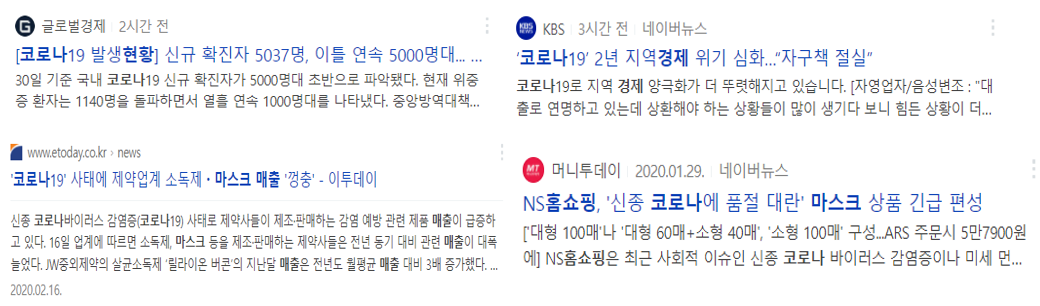

In [15]:
Image("covid2.png")

### **2. 데이터 설명**
##### 쿠팡에서 인기순으로 마스크, 체온계, 자가진단기 검색 시 나오는 100-120개의 상품 데이터를 수집, 그 후 네이버 뉴스판과 쿠팡에 '코로나' 검색 시 나오는 100-120개의 상품 데이터를 스크롤링해 사용했습니다.

### **3. 분석 과정**

#### *3-1. 마스크*

#### 1) 데이터 수집_웹스크롤링

- 스크롤링 전 홈페이지에서 페이지 소스 및 검사 확인하기
- page1~3 상품 데이터를 랭킹순으로 수집

> Page1

In [17]:
# 필요한 라이브러리 불러오기
import requests
import urllib.request
from bs4 import BeautifulSoup

# 1페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =1
url = f"https://www.coupang.com/np/search?q=%EB%A7%88%EC%8A%A4%ED%81%AC&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=\n&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={page}&rocketAll=false&searchIndexingToken=1=6&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정 
res = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2 = BeautifulSoup(res.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3 = res_2.find_all("div", {"class":"descriptions-inner"})
res_3[0]

# 그 안에 형성되어있는 div 속 클라스 중 name요소만 찾아온다. 
res_3[0].find("div",{"class":"name"}).get_text()
res_3[1].find("div",{"class":"name"}).get_text()

# res_3으로 찾은 텍스트를 전부 가져와 상품 리스트를 생성해준다.
product = []
for i in range(len(res_3)):
  product.append(res_3[i].find("div",{"class":"name"}).get_text())
product


['케어랩 하이클린 새부리형 마스크 대형 비비베이지 50매',
 '코멧 KF94 보건마스크 새부리형 2단접이 대형, 5개입, 20개, 블랙',
 '코멧 일회용 마스크, 100개입, 1개, 블랙',
 '코멧 KF94 보건마스크 새부리형 2단접이 대형, 5개입, 20개, 화이트',
 'FITI 인증 미카 덴탈마스크 국내생산 비말차단 일회용마스크 50매',
 '시노텍스 귀편하고 숨쉬기편한 새부리형 신소재 마스크 50매 개별포장, 대형(L) 50매',
 '코멧 일회용 마스크, 100개입, 1개, 화이트',
 '한스웰 한마음 일회용 황사 마스크 대형 KF94, 1개입, 100개',
 '에어에이드 새부리형 마스크 컬러 대형 귀편한 숨쉬기 편한 일회용 칼라 국산 국내생산 마스크, 50매, 핑크',
 '에어데이즈 보건용 마스크 대형 KF94, 1개입, 50개, 흰색',
 '고르고 오순도순 일회용 마스크 성인용 블랙, 50개입, 1개',
 '참존 2D 새부리형 보건용 마스크 대형 성인용 KF94, 50개입, 1개, 블랙',
 '국산 클린젠 컬러 새부리형마스크 대형 50매, 옐로우',
 '탐사 KF94 황사방역 마스크 대형, 화이트, 100매, 1개',
 '고르고 바른 일회용 마스크 성인용, 1개, 코랄, 50개입',
 '닥터바이오 가볍고 숨쉬기 편한 밀착형 디자인 패션 컬러 국산 마스크',
 'IDAHUM 유아용 캐릭터 마스크 새부리형',
 '지금 4중 셀프케어 일회용 덴탈 마스크 대형, 50개입, 1개, 블랙',
 '탐사 KF94 황사방역 마스크 대형, 화이트, 10매, 10개',
 '탐사 KF94 황사방역 마스크 대형, 블랙, 10매, 10개',
 '아이다움 아동용 구름 자동차 캐릭터 마스크 새부리형 10p',
 '탐사 KF94 방역마스크 새부리형 2단접이 대형 (5매입 지퍼백 10개), 50p, 1개, 블랙',
 '비에스에스 국산 발레오 스타일 새부리형 일회용 마스크 대형 30매, 원썸 베이지',
 '탐사 KF94 방역마스크 새부리형 2단접이 대형 (5매입 지퍼백 10개

>Page2

In [18]:
# 2페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =2
url = f"https://www.coupang.com/np/search?q=%EB%A7%88%EC%8A%A4%ED%81%AC&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={page}&rocketAll=false&searchIndexingToken=1=6&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정
res = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2 = BeautifulSoup(res.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3 = res_2.find_all("div", {"class":"descriptions-inner"})
res_3[0]

# 그 안에 형성되어있는 div 속 클라스 중 name요소만 찾아온다. 
res_3[0].find("div",{"class":"name"}).get_text()
res_3[1].find("div",{"class":"name"}).get_text()

# res_3으로 찾은 텍스트를 전부 가져와 상품 리스트2를 생성해준다.
product2 = []
for i in range(len(res_3)):
  product2.append(res_3[i].find("div",{"class":"name"}).get_text())
product2


['탐사 KF94 마스크 새부리형 2단접이 대형, 100개입, 1개, 화이트',
 '코멧 KF-AD 비말차단 마스크 (개별포장), 100개입, 1개',
 '고르고 오순도순 일회용 마스크 성인용, 50개입, 1개, 화이트',
 '비에스에스 기프트마스크 덴탈마스크 100매, 일반형, 검정',
 '코멧 일회용 마스크, 50개, 1개, 블랙',
 '엠피가드 국내생산 참편한 마스크 대형 KF-AD 화이트, 50매, 2개',
 '코멧 일회용 마스크, 50개입, 1개, 화이트',
 '탐사 KF94 방역마스크 새부리형 2단접이 중형(5매입 지퍼백 10개), 50p, 1개, 화이트',
 '씨티라이프 건강한 MB 3중 일회용 마스크 대형, 50개입, 1개',
 '참존 톤업핏 마스크 누드업 베이지 중형, 25개입, 1개',
 '탐사 KF-AD 비말차단 마스크 대형, 50개입, 1개',
 '탐사 KF80 마스크 새부리형 2단접이 50p (5매입 지퍼백 10개), 5매, 10개, 대형',
 '국대마스크 황사 미세먼지 마스크 2D 중형 KF94, 5개입, 6개, 흰색',
 '스마트클린 황사차단 마스크 대형 KF80 흰색, 1박스, 50매입',
 '엠피가드 국내생산 참편한 마스크 대형 KF-AD 화이트, 50매, 2개',
 '탐사 KF80 마스크 새부리형 2단접이 50p (5매입 지퍼백 10개), 5매, 10개, 소형',
 '꼼마꼼마 올데이 비말차단 마스크 대형 KFAD, 50개입, 1개, 흰색',
 '비에스에스 스탠다드 블랙 마스크 국산 일회용 100매',
 '웰킵스 황사방역마스크 KF94 중형, 25개입, 1개, 백색',
 '에어데이즈 새부리형 마스크 C타입 대형 블랙 KF94, 30개입, 2개',
 '탐사 KF80 마스크 새부리형 2단접이 50p (5매입 지퍼백 10개), 5매, 10개, 중형',
 '웰킵스 미세먼지황사마스크 대형 KF80, 1개, 25개',
 '비에스에스 기프트마스크 덴탈마스크 100매, 일반형, 검정',
 '웰킵스 리얼블랙 황사마스크 대형 KF94, 25개입, 

>Page3

In [19]:
# 3페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =3
url = f"https://www.coupang.com/np/search?q=%EB%A7%88%EC%8A%A4%ED%81%AC&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={page}&rocketAll=false&searchIndexingToken=1=6&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정
res = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2 = BeautifulSoup(res.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3 = res_2.find_all("div", {"class":"descriptions-inner"})
res_3[0]

# 그 안에 형성되어있는 div 속 클라스 중 name요소만 찾아온다. 
res_3[0].find("div",{"class":"name"}).get_text()
res_3[1].find("div",{"class":"name"}).get_text()

# res_3으로 찾은 텍스트를 전부 가져와 상품 리스트3를 생성해준다.
product3 = []
for i in range(len(res_3)):
  product3.append(res_3[i].find("div",{"class":"name"}).get_text())
product3

['탐사 KF-AD 비말차단 마스크 대형, 50개입, 1개',
 '퓨어맥스 방역마스크 KF94 대형 화이트, 1매입, 50매',
 '고래마스크 일회용 덴탈마스크 성인용, 연베이지, 50매, 1개',
 '코멧 특대형 일회용 마스크 XL, 100매, 1개, 블랙',
 '탐사 KF80 마스크 새부리형 2단접이 50p (5매입 지퍼백 10개), 5매, 10개, 소형',
 '미마마스크 보건용 마스크 대형 KF94, 30개입, 1개, 검정',
 '고르고 바른 일회용 마스크 성인용, 2개, 블랙, 50개입',
 '국대마스크 황사 미세먼지 마스크 2D 중형 KF94, 5개입, 6개, 흰색',
 'KF94 여름원단 마스크 숨편한 여름용 국산자재 대형 100매',
 '웰킵스 리얼블랙 황사마스크 대형 KF94, 25개입, 1개',
 '웰킵스 황사방역마스크 대형 KF94, 50개입, 1개, 백색',
 '아에르 어드밴스드 PLUS 보건용 마스크 L KF94, 1개입, 50개, 그레이',
 '국산 클린젠 컬러 새부리형마스크 대형 50매, 옐로우',
 '에어데이즈 새부리형 마스크 C타입 대형 블랙 KF94, 30개입, 2개',
 '크리넥스 비말 차단 라이트핏 쿨 마스크 대 KF AD, 35개입, 1개, 1개',
 '지금 4중 셀프케어 일회용 덴탈 마스크 대형, 50개입, 1개, 블랙',
 '참존 톤업핏 마스크 로맨스업 코랄 중형, 25개입, 1개',
 '참존 톤업핏 마스크 대형, 25개입, 1개, 누드업 베이지',
 '참존 톤업핏 마스크 중형 KF80 블랙, 25개입, 1개',
 'CLA 슬림핏 새부리형 마스크 중형, 25매입, 1개, 스킨베이지',
 '끌라삐엘 보건용 황사방역 마스크 대형 KF94, 1개입, 50개',
 '블랙딘 개별포장 일회용마스크3중필터 블랙50매, 50개, 1개',
 '시노텍스 귀편하고 숨쉬기편한 새부리형 신소재 마스크 50매 개별포장, 중형(M) 50매',
 '탐사 KF80 마스크 새부리형 2단접이 50p (5매입 지퍼백 10개), 5매, 10개, 중형',
 '

In [20]:
# 형태소 분석을 위해 상품1,2,3 합쳐서 텍스트 파일로 저장(코드 입력시 오류로 직접 에디터로 저장)
mask_data = product+product2+product3
mask_data

['케어랩 하이클린 새부리형 마스크 대형 비비베이지 50매',
 '코멧 KF94 보건마스크 새부리형 2단접이 대형, 5개입, 20개, 블랙',
 '코멧 일회용 마스크, 100개입, 1개, 블랙',
 '코멧 KF94 보건마스크 새부리형 2단접이 대형, 5개입, 20개, 화이트',
 'FITI 인증 미카 덴탈마스크 국내생산 비말차단 일회용마스크 50매',
 '시노텍스 귀편하고 숨쉬기편한 새부리형 신소재 마스크 50매 개별포장, 대형(L) 50매',
 '코멧 일회용 마스크, 100개입, 1개, 화이트',
 '한스웰 한마음 일회용 황사 마스크 대형 KF94, 1개입, 100개',
 '에어에이드 새부리형 마스크 컬러 대형 귀편한 숨쉬기 편한 일회용 칼라 국산 국내생산 마스크, 50매, 핑크',
 '에어데이즈 보건용 마스크 대형 KF94, 1개입, 50개, 흰색',
 '고르고 오순도순 일회용 마스크 성인용 블랙, 50개입, 1개',
 '참존 2D 새부리형 보건용 마스크 대형 성인용 KF94, 50개입, 1개, 블랙',
 '국산 클린젠 컬러 새부리형마스크 대형 50매, 옐로우',
 '탐사 KF94 황사방역 마스크 대형, 화이트, 100매, 1개',
 '고르고 바른 일회용 마스크 성인용, 1개, 코랄, 50개입',
 '닥터바이오 가볍고 숨쉬기 편한 밀착형 디자인 패션 컬러 국산 마스크',
 'IDAHUM 유아용 캐릭터 마스크 새부리형',
 '지금 4중 셀프케어 일회용 덴탈 마스크 대형, 50개입, 1개, 블랙',
 '탐사 KF94 황사방역 마스크 대형, 화이트, 10매, 10개',
 '탐사 KF94 황사방역 마스크 대형, 블랙, 10매, 10개',
 '아이다움 아동용 구름 자동차 캐릭터 마스크 새부리형 10p',
 '탐사 KF94 방역마스크 새부리형 2단접이 대형 (5매입 지퍼백 10개), 50p, 1개, 블랙',
 '비에스에스 국산 발레오 스타일 새부리형 일회용 마스크 대형 30매, 원썸 베이지',
 '탐사 KF94 방역마스크 새부리형 2단접이 대형 (5매입 지퍼백 10개

#### 2) 형태소 분석 및 전처리

In [21]:
# 저장한 텍스트 파일 불러오기 및 읽기 ( 경로 설정은 각자 사본 저장 후 작업!)
with open("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트1/쿠팡마스크.txt") as f:     #경로
  text = f.read()
# 불필요한 띄어쓰기, 괄호 공백 처리한 텍스트를 mask120변수로 지정
text_1 = text.replace('\n','')
text_2 = text_1.replace("(","")
mask_120 = text_2.replace(")","") 
mask_120

"'고르고 바른 일회용 마스크 성인용, 50개입, 1개, 블랙', '코멧 일회용 마스크, 100개입, 1개, 블랙', '코멧 일회용 마스크, 100개입, 1개, 화이트', '탐사 KF-AD 비말차단 마스크 대형, 100개입, 1개', '비에스에스 기프트마스크 덴탈마스크 100매, KF-AD, 흰색', '더착한 비말차단 마스크 KF-AD / 더착한 쁘띠럽 마스크, 일반형 쁘띠 그레이 2BOX 100매', '코멧 일회용 마스크, 50개입, 1개, 블랙', '스마트클린 황사방역 마스크 대형 KF94 흰색, 1박스, 50매입', '트러블제로/ 연약한 피부에 부드러운 국내원단 비말차단 고래 컬러 일회용마스크, 딥 네이비 2box - 100매', '3겹 일회용 성인 마스크, 50매입, 1박스, 화이트', '브이콧대 비말차단 마스크 KF-AD 화이트 50+50 총 100매', '덴탈마스크 깨끗한마스크 비말차단 KFAD 패션 컬러마스크 귀안아픈 마스크, 1번 일회용화이트 50매입', '코멧 KF94 보건마스크 새부리형 2단접이 대형, 5개입, 20개, 화이트', '키퍼 마스크 비말차단 대형 KF-AD 식약처, 100매입', '메이투 편안한 성인 아동 스포츠 패션마스크 3개입, 네이비', '탐사 KF94 마스크 레귤러핏 10매 지퍼백*10개, 블랙, 10매, 10개', '탐사 KF94 마스크 레귤러핏 개별포장, 대형, 1매, 100개', '코멧 일회용 마스크, 50개입, 1개, 화이트', '에어에이드 비말차단 덴탈마스크 대형 식약처허가 퍼플 핑크 베이지 일회용 KFAD 50매, 그레이 50매', '탐사 KF94 방역마스크 새부리형 2단접이 50p 5매입 지퍼백 10개, 대형', '코멧 일회용 마스크, 50개입, 1개, 베이지', '코멧 KF-AD 비말차단 마스크 개별포장, 100개입, 1개', '고르고 바른 일회용 마스크 성인용, 50개입, 2개, 블랙', '에어에이드 비말차단 덴탈마스크 대형 식약처허가 퍼플 핑크 베이지 일회용 KFAD 50매, 퍼플 50매', '웰킵스 황사

In [22]:
# 형태소 분석기Okt.nouns를 사용해 명사로 쪼갠 것을 mask_n 변수로 지정
from konlpy.tag import Okt
okt = Okt()
mask_n = okt.nouns(mask_120)
mask_n

['일회용',
 '마스크',
 '인용',
 '개입',
 '개',
 '블랙',
 '코멧',
 '일회용',
 '마스크',
 '개입',
 '개',
 '블랙',
 '코멧',
 '일회용',
 '마스크',
 '개입',
 '개',
 '화이트',
 '탐사',
 '비말',
 '차단',
 '마스크',
 '대형',
 '개입',
 '개',
 '비',
 '에스',
 '에스',
 '기프트',
 '마스크',
 '덴탈',
 '마스크',
 '매',
 '흰색',
 '더',
 '비말',
 '차단',
 '마스크',
 '더',
 '쁘띠',
 '럽',
 '마스크',
 '일반',
 '쁘띠',
 '그레이',
 '매',
 '코멧',
 '일회용',
 '마스크',
 '개입',
 '개',
 '블랙',
 '스마트',
 '클린',
 '황사',
 '방역',
 '마스크',
 '대형',
 '흰색',
 '박스',
 '매입',
 '트러블',
 '제로',
 '피부',
 '국내',
 '원단',
 '비말',
 '차단',
 '고래',
 '컬러',
 '일회용',
 '마스크',
 '딥',
 '네이비',
 '매',
 '겹',
 '일회용',
 '성인',
 '마스크',
 '매입',
 '박스',
 '화이트',
 '브이',
 '콧대',
 '비말',
 '차단',
 '마스크',
 '화이트',
 '총',
 '매',
 '덴탈',
 '마스크',
 '마스크',
 '비말',
 '차단',
 '패션',
 '컬러',
 '마스크',
 '안',
 '마스크',
 '번',
 '일회용',
 '화이트',
 '매입',
 '코멧',
 '보건',
 '마스크',
 '부리',
 '접',
 '대형',
 '개입',
 '개',
 '화이트',
 '키퍼',
 '마스크',
 '비말',
 '차단',
 '대형',
 '식약처',
 '매입',
 '메이',
 '투',
 '성인',
 '아동',
 '스포츠',
 '패션',
 '마스크',
 '개입',
 '네이비',
 '탐사',
 '마스크',
 '레귤러핏',
 '매',
 '지퍼',
 '개',
 '블랙',
 '매',
 '개',
 '탐사',
 '마스크',
 

In [23]:
# 불용어 제거(조사 빼기)
조사뺀명사 = []
for word in mask_n:
  if len(word) > 1 :
    조사뺀명사.append(word)

조사뺀명사

['일회용',
 '마스크',
 '인용',
 '개입',
 '블랙',
 '코멧',
 '일회용',
 '마스크',
 '개입',
 '블랙',
 '코멧',
 '일회용',
 '마스크',
 '개입',
 '화이트',
 '탐사',
 '비말',
 '차단',
 '마스크',
 '대형',
 '개입',
 '에스',
 '에스',
 '기프트',
 '마스크',
 '덴탈',
 '마스크',
 '흰색',
 '비말',
 '차단',
 '마스크',
 '쁘띠',
 '마스크',
 '일반',
 '쁘띠',
 '그레이',
 '코멧',
 '일회용',
 '마스크',
 '개입',
 '블랙',
 '스마트',
 '클린',
 '황사',
 '방역',
 '마스크',
 '대형',
 '흰색',
 '박스',
 '매입',
 '트러블',
 '제로',
 '피부',
 '국내',
 '원단',
 '비말',
 '차단',
 '고래',
 '컬러',
 '일회용',
 '마스크',
 '네이비',
 '일회용',
 '성인',
 '마스크',
 '매입',
 '박스',
 '화이트',
 '브이',
 '콧대',
 '비말',
 '차단',
 '마스크',
 '화이트',
 '덴탈',
 '마스크',
 '마스크',
 '비말',
 '차단',
 '패션',
 '컬러',
 '마스크',
 '마스크',
 '일회용',
 '화이트',
 '매입',
 '코멧',
 '보건',
 '마스크',
 '부리',
 '대형',
 '개입',
 '화이트',
 '키퍼',
 '마스크',
 '비말',
 '차단',
 '대형',
 '식약처',
 '매입',
 '메이',
 '성인',
 '아동',
 '스포츠',
 '패션',
 '마스크',
 '개입',
 '네이비',
 '탐사',
 '마스크',
 '레귤러핏',
 '지퍼',
 '블랙',
 '탐사',
 '마스크',
 '레귤러핏',
 '개별',
 '포장',
 '대형',
 '코멧',
 '일회용',
 '마스크',
 '개입',
 '화이트',
 '에어',
 '이드',
 '비말',
 '차단',
 '덴탈',
 '마스크',
 '대형',
 '식약처',
 '허가',
 '퍼플',
 '핑크',
 '베이

In [24]:
# 조사뺀명사 리스트에 있는 각 단어의 빈도수 나타내기
from collections import Counter
빈도수 = Counter(조사뺀명사).most_common()
빈도수

[('마스크', 71),
 ('대형', 31),
 ('개입', 29),
 ('일회용', 18),
 ('블랙', 18),
 ('비말', 13),
 ('차단', 13),
 ('화이트', 12),
 ('부리', 10),
 ('황사', 9),
 ('방역', 9),
 ('매입', 9),
 ('코멧', 8),
 ('탐사', 7),
 ('에스', 6),
 ('덴탈', 6),
 ('베이지', 6),
 ('인용', 5),
 ('쁘띠', 4),
 ('그레이', 4),
 ('컬러', 4),
 ('보건', 4),
 ('식약처', 4),
 ('지퍼', 4),
 ('에어', 4),
 ('중형', 4),
 ('흰색', 3),
 ('박스', 3),
 ('국내', 3),
 ('레귤러핏', 3),
 ('개별', 3),
 ('포장', 3),
 ('이드', 3),
 ('허가', 3),
 ('퍼플', 3),
 ('푸른', 3),
 ('톤업핏', 3),
 ('기프트', 2),
 ('일반', 2),
 ('고래', 2),
 ('네이비', 2),
 ('성인', 2),
 ('패션', 2),
 ('스포츠', 2),
 ('핑크', 2),
 ('백색', 2),
 ('필터', 2),
 ('국산', 2),
 ('에르', 2),
 ('생산', 2),
 ('미세먼지', 2),
 ('숨쉬기', 2),
 ('검정', 2),
 ('스탠다드', 2),
 ('사방', 2),
 ('역용', 2),
 ('누드', 2),
 ('한스', 2),
 ('한마음', 2),
 ('로맨스', 2),
 ('스마트', 1),
 ('클린', 1),
 ('트러블', 1),
 ('제로', 1),
 ('피부', 1),
 ('원단', 1),
 ('브이', 1),
 ('콧대', 1),
 ('키퍼', 1),
 ('메이', 1),
 ('아동', 1),
 ('웰킵스', 1),
 ('사용', 1),
 ('흥얼', 1),
 ('이황', 1),
 ('사방역', 1),
 ('특대', 1),
 ('빅사', 1),
 ('이즈', 1),
 ('어드밴스드', 1),
 ('일리

In [25]:
# 총 빈도수 체크하기
빈도수 = dict(빈도수)
len(빈도수)

107

In [26]:
# 불용어 제거(개입, 매입, 마스크라는 단어 제거, 빈도수2이상만 출력)
빈도수_n이상 = {}
for word, n_count in 빈도수.items():
  if n_count > 2 and word != '개입' and word != '매입' and word != '마스크' :
    빈도수_n이상[word] = n_count
빈도수_n이상

{'대형': 31,
 '일회용': 18,
 '블랙': 18,
 '비말': 13,
 '차단': 13,
 '화이트': 12,
 '부리': 10,
 '황사': 9,
 '방역': 9,
 '코멧': 8,
 '탐사': 7,
 '에스': 6,
 '덴탈': 6,
 '베이지': 6,
 '인용': 5,
 '쁘띠': 4,
 '그레이': 4,
 '컬러': 4,
 '보건': 4,
 '식약처': 4,
 '지퍼': 4,
 '에어': 4,
 '중형': 4,
 '흰색': 3,
 '박스': 3,
 '국내': 3,
 '레귤러핏': 3,
 '개별': 3,
 '포장': 3,
 '이드': 3,
 '허가': 3,
 '퍼플': 3,
 '푸른': 3,
 '톤업핏': 3}

#### 3) 시각화

In [27]:
# 폰트가 깨지는 오류로 필요한 패키지 불러오기
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 폰트가 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트를 설정해 주기에 앞서 matplotlib의 버전과 위치 정보를 가져오기
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

# 터미널을 이용해 해당 위치로 가기
print ('설정파일 위치: ', mpl.matplotlib_fname())

# 설치된 폰트 찍어보기
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))

# 한국어로된 폰트파일도 영어로 써야하기 때문에 꼭 체크!
font_list
ㄴ
# 이름에 'Mapo'가 들어간 폰트만 가져오기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Mapo' in f.name]

버전:  3.4.3
설치 위치:  C:\Users\minak\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\minak\.matplotlib
캐시 위치:  C:\Users\minak\.matplotlib
설정파일 위치:  C:\Users\minak\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
455


[('MapoMaponaru', 'C:\\Windows\\Fonts\\MapoMaponaru.ttf'),
 ('MapoPeacefull', 'C:\\Windows\\Fonts\\MapoPeacefull.ttf'),
 ('MapoAgape', 'C:\\Windows\\Fonts\\MapoAgape.ttf'),
 ('MapoBackpacking', 'C:\\Windows\\Fonts\\MapoBackpacking.ttf'),
 ('MapoDPP', 'C:\\Windows\\Fonts\\MapoDPP.ttf'),
 ('MapoFlowerIsland', 'C:\\Windows\\Fonts\\MapoFlowerIsland.ttf'),
 ('MapoDacapo', 'C:\\Windows\\Fonts\\MapoDacapo.ttf'),
 ('MapoHongdaeFreedom', 'C:\\Windows\\Fonts\\MapoHongdaeFreedom.ttf'),
 ('MapoGoldenPier', 'C:\\Windows\\Fonts\\MapoGoldenPier.ttf')]

> 막대그래프

None


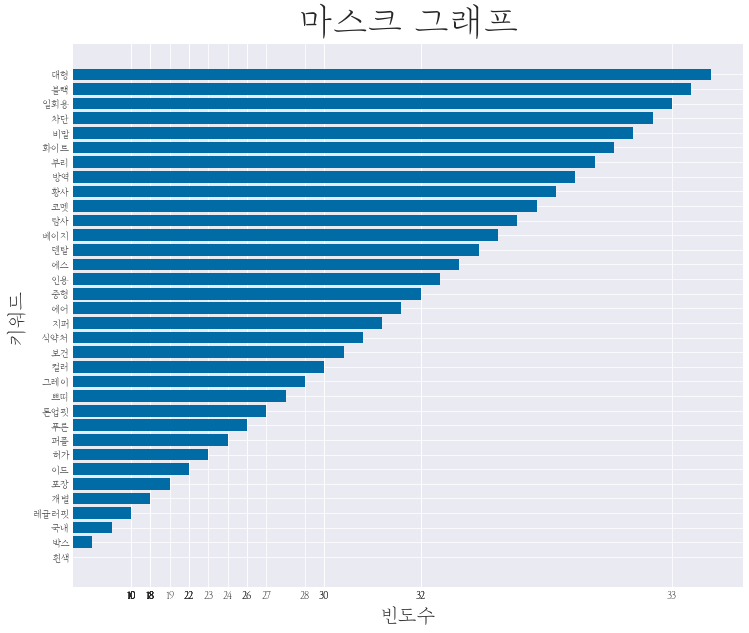

In [28]:
# 정렬된 명사들, 정렬된 값들을 이용해 막대 그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# print(plt.style.available) # 그래프 스타일 확인하기
print(plt.style.use('seaborn-dark'))

# 폰트 설정
plt.rc("font",family="MapoFlowerIsland")

# 그래프 전체 사이즈 및 제목 설정
plt.figure(figsize = (12, 10))
plt.title("마스크 그래프", fontsize=37)

# xlabel/ylabel 이름,폰트,여백 설정
plt.ylabel("키워드", fontsize=20)
plt.xlabel("빈도수", fontsize=20)
plt.grid()

# x/y축에 들어갈 데이터 변수 지정
정렬된명사들 = sorted(빈도수_n이상,key=빈도수_n이상.get)
정렬된값들 = sorted(빈도수_n이상.values())

# 세로 막대 그래프
# plt.bar(range(len(정렬된명사들)),정렬된값들, align = "center") 
# plt.xticks(range(len(정렬된명사들)),정렬된명사들, rotation = 90) 

# 가로 막대 그래프
plt.barh(정렬된명사들,(range(len(정렬된값들))), align="center") 
plt.xticks(정렬된값들,(range(len(정렬된명사들))) , rotation=0)
plt.show() 

>워드클라우드

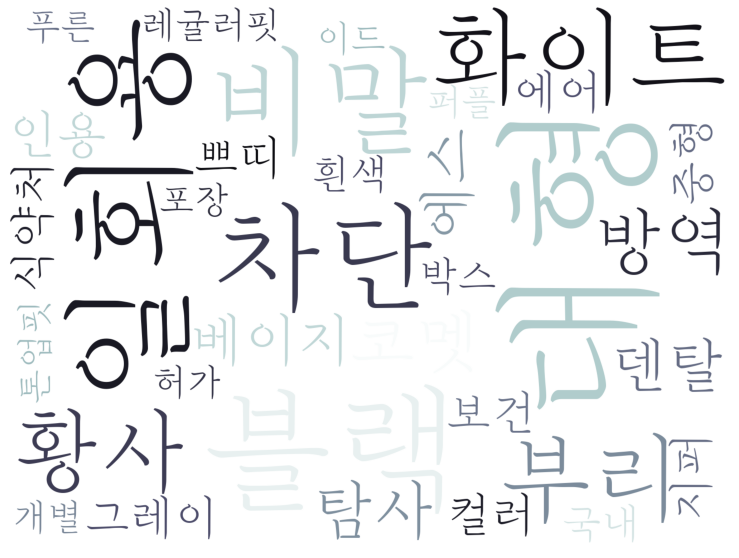

In [35]:
from wordcloud import WordCloud

# 폰트 경로 지정
path = "C:/windows/Fonts/MapoFlowerIsland.ttf"

# 빈도수에 따라 워드 클라우드 (컬러맵 스타일, 폰트 크기대로)출력
# 폰트, 배경색, 가로 세로 너비 지정 
wc = WordCloud(font_path = path, background_color = "white", colormap="bone",
width=1600, height = 1200).generate_from_frequencies(빈도수_n이상)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

Sequential ColorMap 참고 사이트 https://matplotlib.org/stable/tutorials/colors/colormaps.html

### *4-2. 비접촉 체온계*

#### 1) 데이터 수집

> Page1

In [1]:
# 필요한 라이브러리 불러오기
import requests
import urllib.request
from bs4 import BeautifulSoup

# 1페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =1
url =f"https://www.coupang.com/np/search?q=%EB%B9%84%EC%A0%91%EC%B4%89+%EC%B2%B4%EC%98%A8%EA%B3%84&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={page}&rocketAll=false&searchIndexingToken=1=6&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정 
res = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2 = BeautifulSoup(res.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3 = res_2.find_all("div", {"class":"descriptions-inner"})
len(res_3)

# res_3으로 찾은 name요소를 가진 div속 클라스를 전부 가져와 상품 리스트를 생성해준다.
product = []
for i in range(len(res_3)):
  product.append(res_3[i].find("div",{"class":"name"}).get_text())
product

['휴비딕 써모파인더 에스 비접촉식 적외선 체온계 HFS-900, 1개',
 '바른닥터 비접촉 적외선 온도계, 1개',
 '가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개',
 '휴비딕 써모파인더 비접촉식 적외선 체온계 FS-300, 1개',
 '비접촉 적외선 온도계 온도측정기 MM-GP100',
 '휴비딕 토미 오리지널 귀 적외선 체온계 HET-1000, 1개',
 '가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개',
 '오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개',
 '브라운 체온계 IRT-6030 6510 6520 비접촉 체온계 BNT400 [정품/AS가능], 3. 귀 체온계 IRT-6520',
 '아큐템 비접촉 적외선 온도계 JC-T01, 1개',
 '[ TH22 ] 비접촉 적외선 온도계 국내생산 발열감지 국내KC인증 당일발송 생산자 직판, 1개 구매가능',
 'ACRO 발열체크기 비접촉 체온계 온도측정기 온도계 KF-19 PRO',
 '\n                                                        휴비딕 써모파인더 에스 비접촉식 적외선 체온계 HFS-900, 1개\n                                                    ',
 '\n                                                        오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개\n                                                    ',
 '\n                                                        오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개\n                                                    ',
 '\n                      

> Page2

In [2]:
# 2페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기 
page =2
url =f"https://www.coupang.com/np/search?q=%EB%B9%84%EC%A0%91%EC%B4%89+%EC%B2%B4%EC%98%A8%EA%B3%84&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={page}&rocketAll=false&searchIndexingToken=1=6&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정
res_2 = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2_2 = BeautifulSoup(res_2.text, "lxml")

# 가져온 HTML에서 div안 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_2_3 = res_2_2.find_all("div", {"class":"descriptions-inner"})

# res2_3으로 찾은 name요소를 가진 div속 클라스를 전부 가져와 상품 리스트2를 생성해준다.
product_2 = []
for i in range(len(res_2_3)):
  product_2.append(res_2_3[i].find("div",{"class":"name"}).get_text())
product_2

['가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개',
 '비접촉 적외선 온도계 온도측정기 MM-GP100',
 '비접촉 적외선 온도계 온도측정기 MM-GP100',
 'ANYOU 비접촉 체온계 귀 체온계 적외선 체온계',
 '아큐템 비접촉 적외선 온도계 JC-T01, 1개',
 'K9 Pro 자동 손소독 디스펜서 겸용 발열측정 비접촉 적외선 스마트 열체크 온도계',
 '써모케어 체온계 MT-1000, 1개',
 '온도케이 비접촉 적외선 체온계 ONDO K-100, 1개',
 '17시이전 [국내당일출고] 비접촉식 온도계 본제품 아닐시 100배 보상, 1개',
 '초특가 한정 판매 SD 비접촉식 적외선 온도계 재구매율 일등',
 '브라운 체온계 IRT-6030 6510 6520 비접촉 체온계 BNT400 [정품/AS가능], 3. 귀 체온계 IRT-6520',
 '동방의료기(주) 비접촉 비접촉식 체온계 DET-306 AS가능, 1개',
 '온도케이 비접촉 적외선 체온계 ONDO K-200, 1개',
 '휴비딕 뽀로로 비접촉 적외선 체온계 써모파인더 PS300, 1개',
 '국산 비접촉 적외선 온도계 KC인증/ 배터리포함 온도계',
 '아쿠바 비접촉 적외선 온도계 CS-304, 혼합색상, 1개',
 '샤오미 비접촉 비접촉식 발열체크기 적외선 온도측정기 체온계 비접촉 온도계 (국내 당일발송)',
 'K3+ 업소용 비접촉식 비대면 온도계 자동 벽걸이온도측정기+충전지포함/한국어지원, 스탠드거치대 선택안함',
 '모모 비접촉 적외선 온도계 온도측정기 MM-CHECK01, 1개',
 '지아콤 비접촉식 적외선 온도계 FR800, 1개',
 '가정용 비접촉식 온도계 스마트온도계 적외선온도계 온도측정기 체온계 요리온도계 비접촉온도계 비대면 발열체크기 비접촉식온도계, 개',
 'Big이벤트!!!원조 이지첵(16시이전 주문 당일발송) ) 비접촉 온도계 가격 대폭할인 비접촉 적외선 온도계 온도측정기+C핀 핸드폰 자석충전케이블 증정, 화이트, 1개',
 '샤오

> Page3

In [3]:
import requests
import urllib.request
from bs4 import BeautifulSoup

# 3페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기 
page =3
url =f"https://www.coupang.com/np/search?q=%EB%B9%84%EC%A0%91%EC%B4%89+%EC%B2%B4%EC%98%A8%EA%B3%84&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={page}&rocketAll=false&searchIndexingToken=1=6&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정
res_3 = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_3_2 = BeautifulSoup(res_3.text, "lxml")

# 가져온 HTML에서 div안 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3_3 = res_3_2.find_all("div", {"class":"descriptions-inner"})

# res3_3으로 찾은 name요소를 가진 div속 클라스를 전부 가져와 상품 리스트3를 생성해준다.
product_3 = []
for i in range(len(res_3_3)):
  product_3.append(res_3_3[i].find("div",{"class":"name"}).get_text())
product_3

['가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개',
 '비접촉 적외선 온도계 LT-752B, 1개',
 '써모케어 체온계 MT-1000, 1개',
 '비접촉 체온측정 가정용 디지털 온도계 온도측정기 고정밀 적외선센서 빠른측정 OTM-100, 1개',
 '휴비딕 써모파인더 에스 비접촉식 적외선 체온계 HFS-900, 1개',
 '일동제약 이지템 노터치 피부 적외선 체온계, 1개',
 '온도케이 비접촉 적외선 체온계 ONDO K-200, 1개',
 '피부 적외선 비접촉 체온계 KDT-100, 1개',
 '이지패스 K9B 자동 비접촉 발열체크 업소용 적외선 온도측정기 비대면 열체크 비접촉식 온도계, 구성1: EZ9본체+충전배터리+아답타',
 '[당일출고] 비접촉식 한국어버전 적외선 온도계 K9B (KC인증 무상A/S), K9B+미니삼각대+충전지+어뎁터+2M케이블+안내판',
 '아큐템 비접촉 적외선 온도계 JC-T01, 1개',
 '써모케어 체온계 MT-1000, 1개',
 '[ TH22 ] 비접촉 적외선 온도계 국내생산 발열감지 국내KC인증 당일발송 생산자 직판, 1개 구매가능',
 '행복한비접촉 국산 적외선 온도계/세이프스타트, 상세페이지 참조',
 '한국국내생산 비접촉식적외선온도측정기jmh203k+손소독제2ml100장, 상세페이지 참조',
 '메카솔루션 비접촉식 적외선 온도계, 1개',
 'Fever365 비접촉식 적외선 체온계+거치대 세트, 화이트칼라',
 '[500개한정수량] 비접촉 적외선 온도계 온도측정기, 상세페이지 참조',
 '[총알배송 주문다음날 도착] 비접촉 적외선 국산 온도계 KC인증 AS가능 국산체온계 비접촉체온계 가정용체온계',
 '세이프 스타트 비접촉식 체온계 국내생산 적외선 온도계 안전성 정확성',
 '비접촉 자동 손소독 발열체크기 K9PRO W 열체크기계 비대면 온도 체온 측정기 발열체크 손소독기 체온계 업소용 손소독제 스탠드 손목 디스펜서 비접촉식 적외선 온도계 프로, 03_K9PRO_기본+삼각대',
 '아

In [4]:
# 형태소 분석을 위해 상품1,2,3 합쳐서 텍스트 파일로 저장(코드 입력시 오류로 직접 에디터로 저장)
thermometer = product + product_2 + product_3
thermometer

['휴비딕 써모파인더 에스 비접촉식 적외선 체온계 HFS-900, 1개',
 '바른닥터 비접촉 적외선 온도계, 1개',
 '가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개',
 '휴비딕 써모파인더 비접촉식 적외선 체온계 FS-300, 1개',
 '비접촉 적외선 온도계 온도측정기 MM-GP100',
 '휴비딕 토미 오리지널 귀 적외선 체온계 HET-1000, 1개',
 '가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개',
 '오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개',
 '브라운 체온계 IRT-6030 6510 6520 비접촉 체온계 BNT400 [정품/AS가능], 3. 귀 체온계 IRT-6520',
 '아큐템 비접촉 적외선 온도계 JC-T01, 1개',
 '[ TH22 ] 비접촉 적외선 온도계 국내생산 발열감지 국내KC인증 당일발송 생산자 직판, 1개 구매가능',
 'ACRO 발열체크기 비접촉 체온계 온도측정기 온도계 KF-19 PRO',
 '\n                                                        휴비딕 써모파인더 에스 비접촉식 적외선 체온계 HFS-900, 1개\n                                                    ',
 '\n                                                        오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개\n                                                    ',
 '\n                                                        오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개\n                                                    ',
 '\n                      

#### 2) 형태소 분석 및 전처리

In [5]:
# 저장한 텍스트 파일 불러오기 및 읽기
with open("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트1/체온계.txt") as f:     #경로
  text = f.read()
# 불필요한 띄어쓰기, 괄호 공백 처리하기
text_1 = text.replace('\n','')
text_2 = text_1.replace("(","")
tem_120 = text_2.replace(")","") 
tem_120 

"['가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개', '휴비딕 토미 오리지널 귀 적외선 체온계 HET-1000, 1개', '휴비딕 써모파인더 에스 비접촉식 적외선 체온계 HFS-900, 1개', '오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개', '비접촉 가정용 온도계 FC-IR200', '아큐템 비접촉 적외선 온도계 JC-T01, 1개', '아큐템 비접촉 적외선 온도계 JC-T01, 1개', '포라 IR18 귀적외선체온계 블루 TD-1118, 1개', '[ TH22 ] 비접촉 적외선 온도계 국내생산 발열감지 국내KC인증 당일발송 생산자 직판, 1개 구매가능', '가정용 [국내당일출고] 비접촉식 적외선 온도계 온도측정기 TF-100 1개', '[국내당일출고] 블루온 국산 비접촉 적외선 온도계 가정용 업소용 온도 측정기', '[ TH40 ] 비접촉 적외선 온도계 국내생산 당일발송 국내 KC인증 빠른AS 비대면 가정용 발열체크, 1개', '휴비딕 써모파인더 에스 비접촉식 적외선 체온계 HFS-900, 1개', '휴비딕 토미 오리지널 귀 적외선 체온계 HET-1000, 1개', '휴비딕 토미 오리지널 귀 적외선 체온계 HET-1000, 1개', '오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개', '오시스 디지털 듀얼 비접촉 체온계 EISI-ODT-1A, 1개', 'BRAUN 체온계 IRT6030, 1개', '폴리그린 전자체온계 KD-1351, 1개', '[체크온 국산온도계+파우치 ] 비접촉 온도계 비접촉식 온도측정기, 화이트, 1개', 'TAMNA 비접촉 가정용 온도계 FC-IR200, 1개', '휴비딕 토미 오리지널 귀 적외선 체온계 HET-1000, 1개', '써모케어 체온계 MT-1000, 1개', '제스파 비접촉 겸용 2 in 1 LED 체온계 ZPM200, 1개', '이지체크 국산온도계+파우치 비접촉 온도계 비접촉식 온도측정기, 1개, 블랙', '힐링팩토리 힐링써모 귀 이마 겸용 적외선 체온계 

In [6]:
# 형태소 분석기Okt.nouns를 사용해 명사로 쪼갠 것을 tem_n 변수로 지정
# !pip install konlpy
from konlpy.tag import Okt
okt = Okt()
tem_n = okt.nouns(tem_120)
tem_n

['가정',
 '용',
 '국내',
 '당일',
 '출고',
 '비',
 '접촉',
 '적외선',
 '온도계',
 '온도',
 '측정기',
 '개',
 '휴비딕',
 '토미',
 '리지',
 '널',
 '귀',
 '적외선',
 '체온계',
 '개',
 '휴비딕',
 '파인더',
 '에스',
 '비',
 '접촉',
 '적외선',
 '체온계',
 '개',
 '시스',
 '디지털',
 '듀얼',
 '비',
 '접촉',
 '체온계',
 '개',
 '비',
 '접촉',
 '가정',
 '용',
 '온도계',
 '큐템',
 '비',
 '접촉',
 '적외선',
 '온도계',
 '개',
 '큐템',
 '비',
 '접촉',
 '적외선',
 '온도계',
 '개',
 '포',
 '적외선',
 '체온계',
 '블루',
 '개',
 '비',
 '접촉',
 '적외선',
 '온도계',
 '국내',
 '생산',
 '발열',
 '감지',
 '국내',
 '인증',
 '당일',
 '발송',
 '생산자',
 '직판',
 '개',
 '구매',
 '가능',
 '가정',
 '용',
 '국내',
 '당일',
 '출고',
 '비',
 '접촉',
 '적외선',
 '온도계',
 '온도',
 '측정기',
 '개',
 '국내',
 '당일',
 '출고',
 '블루',
 '온',
 '국산',
 '비',
 '접촉',
 '적외선',
 '온도계',
 '가정',
 '용',
 '업',
 '소용',
 '온도',
 '측정기',
 '비',
 '접촉',
 '적외선',
 '온도계',
 '국내',
 '생산',
 '당일',
 '발송',
 '국내',
 '인증',
 '비대',
 '가정',
 '용',
 '발열',
 '체크',
 '개',
 '휴비딕',
 '파인더',
 '에스',
 '비',
 '접촉',
 '적외선',
 '체온계',
 '개',
 '휴비딕',
 '토미',
 '리지',
 '널',
 '귀',
 '적외선',
 '체온계',
 '개',
 '휴비딕',
 '토미',
 '리지',
 '널',
 '귀',
 '적외선',
 '체온계',
 '개',
 '시스

In [7]:
# 불용어 제거(조사 빼기)
체온계조사뺀명사 = []
for word in tem_n:
  if len(word) > 1 :
    체온계조사뺀명사.append(word)

체온계조사뺀명사

['가정',
 '국내',
 '당일',
 '출고',
 '접촉',
 '적외선',
 '온도계',
 '온도',
 '측정기',
 '휴비딕',
 '토미',
 '리지',
 '적외선',
 '체온계',
 '휴비딕',
 '파인더',
 '에스',
 '접촉',
 '적외선',
 '체온계',
 '시스',
 '디지털',
 '듀얼',
 '접촉',
 '체온계',
 '접촉',
 '가정',
 '온도계',
 '큐템',
 '접촉',
 '적외선',
 '온도계',
 '큐템',
 '접촉',
 '적외선',
 '온도계',
 '적외선',
 '체온계',
 '블루',
 '접촉',
 '적외선',
 '온도계',
 '국내',
 '생산',
 '발열',
 '감지',
 '국내',
 '인증',
 '당일',
 '발송',
 '생산자',
 '직판',
 '구매',
 '가능',
 '가정',
 '국내',
 '당일',
 '출고',
 '접촉',
 '적외선',
 '온도계',
 '온도',
 '측정기',
 '국내',
 '당일',
 '출고',
 '블루',
 '국산',
 '접촉',
 '적외선',
 '온도계',
 '가정',
 '소용',
 '온도',
 '측정기',
 '접촉',
 '적외선',
 '온도계',
 '국내',
 '생산',
 '당일',
 '발송',
 '국내',
 '인증',
 '비대',
 '가정',
 '발열',
 '체크',
 '휴비딕',
 '파인더',
 '에스',
 '접촉',
 '적외선',
 '체온계',
 '휴비딕',
 '토미',
 '리지',
 '적외선',
 '체온계',
 '휴비딕',
 '토미',
 '리지',
 '적외선',
 '체온계',
 '시스',
 '디지털',
 '듀얼',
 '접촉',
 '체온계',
 '시스',
 '디지털',
 '듀얼',
 '접촉',
 '체온계',
 '체온계',
 '폴리',
 '그린',
 '전자',
 '체온계',
 '체크',
 '국산',
 '온도계',
 '파우치',
 '접촉',
 '온도계',
 '접촉',
 '온도',
 '측정기',
 '화이트',
 '접촉',
 '가정',
 '온도계',
 '휴비딕',
 '토미',
 '리지',
 '

In [8]:
# 조사뺀명사 리스트에 있는 각 단어의 빈도수 나타내기
from collections import Counter
체온계조사뺀명사_count = Counter(체온계조사뺀명사)
체온계조사뺀명사_count

Counter({'가정': 19,
         '국내': 33,
         '당일': 22,
         '출고': 13,
         '접촉': 92,
         '적외선': 90,
         '온도계': 57,
         '온도': 27,
         '측정기': 24,
         '휴비딕': 10,
         '토미': 6,
         '리지': 6,
         '체온계': 132,
         '파인더': 4,
         '에스': 2,
         '시스': 3,
         '디지털': 7,
         '듀얼': 4,
         '큐템': 5,
         '블루': 7,
         '생산': 6,
         '발열': 14,
         '감지': 4,
         '인증': 9,
         '발송': 8,
         '생산자': 4,
         '직판': 4,
         '구매': 3,
         '가능': 12,
         '국산': 17,
         '소용': 5,
         '비대': 6,
         '체크': 9,
         '폴리': 4,
         '그린': 5,
         '전자': 10,
         '파우치': 5,
         '화이트': 8,
         '케어': 7,
         '스파': 1,
         '겸용': 5,
         '블랙': 1,
         '힐링': 4,
         '팩토리': 3,
         '이마': 4,
         '리앤웰': 1,
         '브라운': 31,
         '필터': 22,
         '정품': 13,
         '카스': 1,
         '렌즈': 1,
         '보관': 1,
         '케이스': 2,
         '세트'

In [30]:
# 불용어 제거(각 단어 빈도수가 3이상인 것만 출력)
카운트3이상 = {}
for word, count in 체온계조사뺀명사_count.items():
    if count > 3:
        카운트3이상[word] = count
    카운트3이상

# 카운트3이상 딕셔너리중 '체온계' 제거(상품명과 같기 때문에 불필요)
카운트3이상_딕 = dict(카운트3이상)
카운트3이상_딕
del 카운트3이상_딕['체온계']
카운트3이상_딕

{'가정': 19,
 '국내': 33,
 '당일': 22,
 '출고': 13,
 '접촉': 92,
 '적외선': 90,
 '온도계': 57,
 '온도': 27,
 '측정기': 24,
 '휴비딕': 10,
 '토미': 6,
 '리지': 6,
 '파인더': 4,
 '디지털': 7,
 '듀얼': 4,
 '큐템': 5,
 '블루': 7,
 '생산': 6,
 '발열': 14,
 '감지': 4,
 '인증': 9,
 '발송': 8,
 '생산자': 4,
 '직판': 4,
 '가능': 12,
 '국산': 17,
 '소용': 5,
 '비대': 6,
 '체크': 9,
 '폴리': 4,
 '그린': 5,
 '전자': 10,
 '파우치': 5,
 '화이트': 8,
 '케어': 7,
 '겸용': 5,
 '힐링': 4,
 '이마': 4,
 '브라운': 31,
 '필터': 22,
 '정품': 13,
 '포함': 12,
 '케이': 4,
 '마이크로': 5,
 '라이프': 5,
 '녹십자': 4,
 '알콜': 5,
 '측정': 10,
 '피부': 7,
 '식약처': 6,
 '체온': 4,
 '스캔': 5,
 '증정': 13,
 '크기': 6}

#### 3) 시각화

> 막대 그래프

None


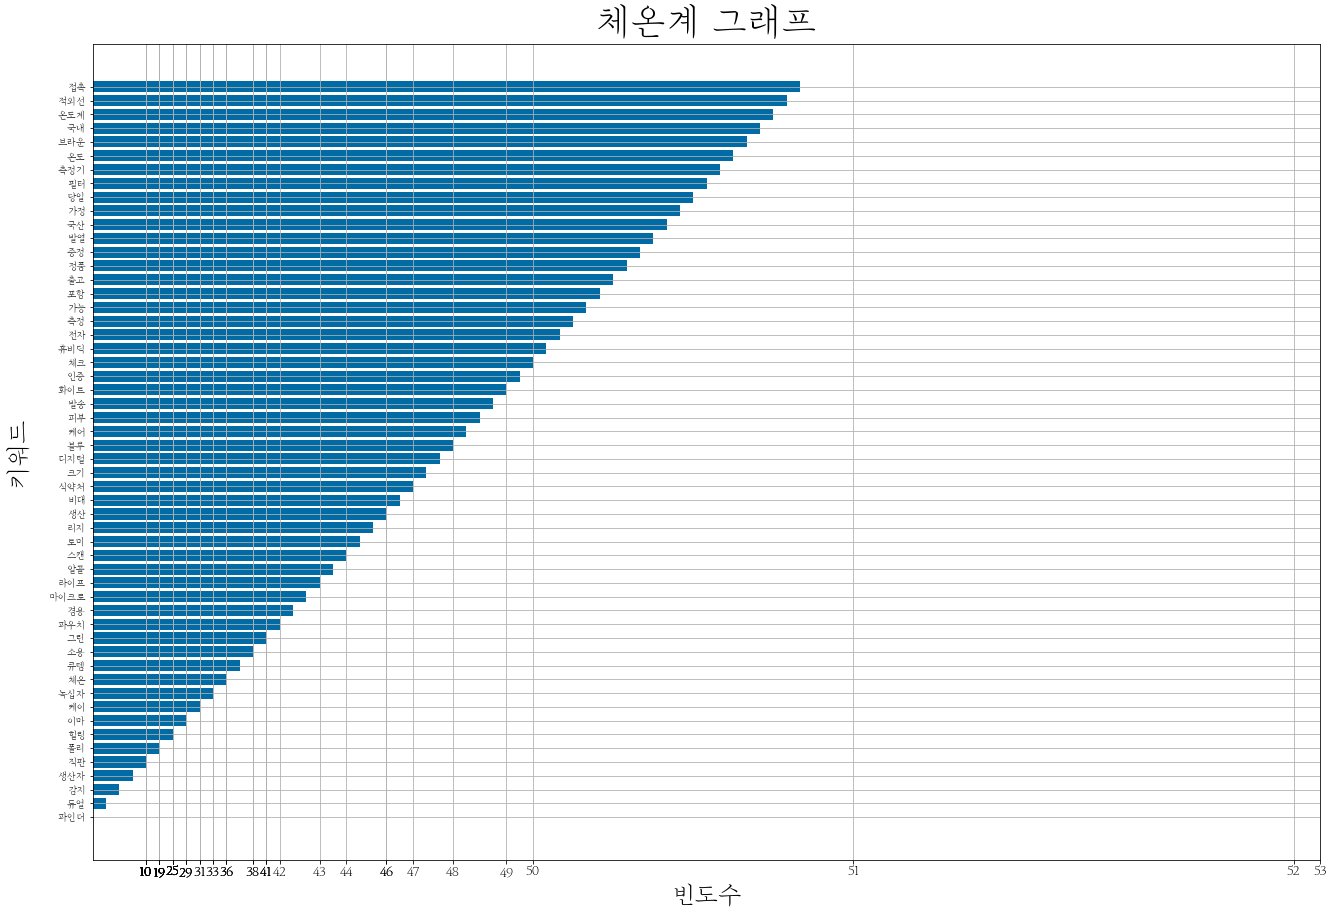

In [47]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# print(plt.style.available) # 그래프 스타일 확인하기
print(plt.style.use('tableau-colorblind10'))

# 전체 폰트 설정
plt.rc("font",family="MapoFlowerIsland")

# 그래프 전체 사이즈 및 제목 디자인 설정
plt.figure(figsize = (22, 15))
plt.title("체온계 그래프", fontsize=37)

# xlabel/ylabel 이름,폰트,여백 설정
plt.xlabel("빈도수", fontsize=25, labelpad=5)
plt.ylabel("키워드", fontsize=25, labelpad=15)
plt.grid()

# x/y축에 들어갈 데이터(카운트3이상_딕key/vlaue) 지정
정렬된명사들 = sorted(카운트3이상_딕,key=카운트3이상_딕.get)
정렬된값들 = sorted(카운트3이상_딕.values())

#세로 막대 그래프
# plt.bar(range(len(정렬된명사들)),정렬된값들, align = "center") 
# plt.xticks(range(len(정렬된명사들)),정렬된명사들, rotation = 75) 

#가로 막대 그래프
plt.barh(정렬된명사들,(range(len(정렬된값들))), align="center") 
plt.xticks(정렬된값들,(range(len(정렬된명사들))) , rotation=0, fontsize=14)
plt.show() 

> 워드 클라우드

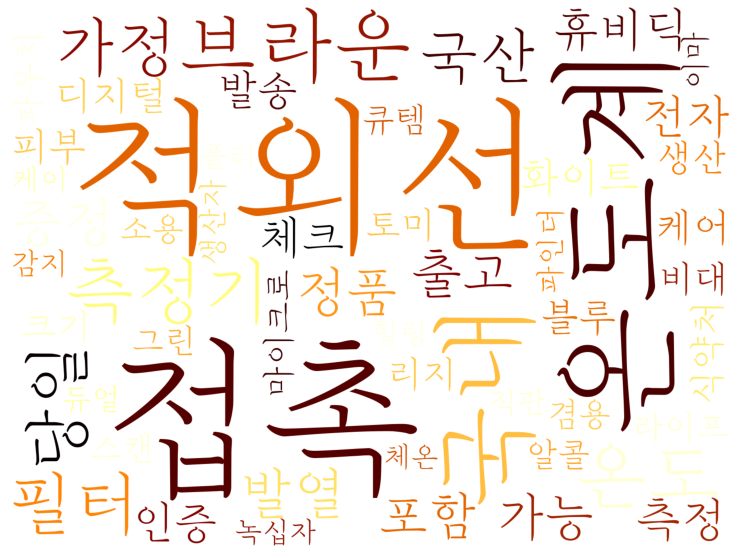

In [48]:
# 워드 클라우드로 시각화 
from wordcloud import WordCloud

# 폰트 경로 지정
path = "C:/windows/Fonts/MapoFlowerIsland.ttf"

# 빈도수에 따라 워드 클라우드 (컬러맵 스타일, 폰트 크기대로)출력
# 폰트, 배경색, 가로 세로 너비 지정  
wc = WordCloud(font_path = path, background_color = "white", colormap="afmhot",
width=1600, height = 1200).generate_from_frequencies(카운트3이상_딕)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

Sequential ColorMap 참고 사이트 https://matplotlib.org/stable/tutorials/colors/colormaps.html

### *4-3. 자가진단(키트)*

#### 1) 데이터 수집

>Page 1

In [1]:
# 필요한 라이브러리 불러오기
import requests
import urllib.request
from bs4 import BeautifulSoup

# 1페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =1
url = f"https://www.coupang.com/np/search?rocketAll=false&q=%EC%9E%90%EA%B0%80%EC%A7%84%EB%8B%A8&brand=&offerCondition=&filter=&availableDeliveryFilter=&filterType=&isPriceRange=false&priceRange=&minPrice=&maxPrice=&{page}&trcid=&traid=&filterSetByUser=true&channel=user&backgroundColor=&searchProductCount=4091&component=&rating=0&sorter=scoreDesc&listSize=72"
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정 
res = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2 = BeautifulSoup(res.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3 = res_2.find_all("div", {"class":"descriptions-inner"})
res_3[0]

# 안에 형성되어있는 div 속 클라스 중 name요소만 찾아온다. 
res_3[0].find("div",{"class":"name"}).get_text()
res_3[1].find("div",{"class":"name"}).get_text()

# res_3으로 찾은 name요소를 가진 div속 클라스를 전부 가져와 상품 리스트를 생성해준다.
product = []
for i in range(len(res_3)):
  product.append(res_3[i].find("div",{"class":"name"}).get_text())
product


['[무배]닥터힐링 휴대용 혈중 산소 포화도 측정기 심박수 맥박 측정 (KC 인증 완료) 한남제약 제품이 아닌 경우 100% 환불해 드립니다.',
 '면역글로불린 항체 검사 진단 키트 이뮨첵 IgG, 1회분',
 '질편한 트리코모나스증 테스트기, 혼합색상',
 '니코틴 소변진단키트 Quick Test 코티닌 측정기 10키트 학교 금연교육',
 '질편한 3 in 1 질염 테스트기 셀프질염테스트, 한정수량특가 1개, -',
 '맥박 산소포화도측정기',
 '메디퓨처 대장검사키트 이지디텍트 8매 대장암 선별 진단 분변잠혈검사',
 '이지디텍트 대장암 자가진단 테스트, 25팩',
 '동방의료기(주) 비접촉 비접촉식 체온계 DET-306 AS가능, 1개',
 '메디퓨처 대장검사키트 이지디텍트 10매 대장암 선별 진단 분변잠혈검사',
 '세이플리 갱년기 테스트기 3p, 혼합색상',
 '레저용 산소포화도 측정기 화이트',
 '마스크 입냄새 자가진단 구취 테스트 중요한 만남 미팅 소개팅 면접준비 꼭 미리 점검하세요, 타입A (블랙)',
 '이지디텍트 대장암 자가진단 테스트, 30팩',
 '이지디텍트 대장암 자가진단 테스트, 35팩',
 '소형 휴대용 입냄새측정기 구취 테스트기 냄새측정기 악취 자가진단 측정 기계 2종, 블랙 + 1개',
 '대장검사키트 분변잠혈검사 이지디텍트 용종선종 3매',
 '손목 온도계 밴드 37.5도 색깔변하는 팔찌, 네이비, L호',
 '이지디텍트 대장암 자가진단 테스트, 45팩',
 '나린케어 발열 체크밴드/자가진단 발열체크밴드 패스밴드 신속한 발열체크 37도 발열체크 음이온 건강밴드',
 '자가진단키트 (체온계임)',
 '이지디텍트 대장암 자가진단 테스트, 20팩',
 '메디퓨처 대장검사키트 이지디텍트 5매 대장암 선별 진단 분변잠혈검사',
 '메디퓨처 대장검사키트 이지디텍트 1매 대장암 선별 진단 분변잠혈검사',
 '메디퓨처 대장검사키트 이지디텍트 4매 대장암 선별 진단 분변잠혈검사',
 '문예춘추사 - 가장 쉬운 8체질 자가진단',
 '이지디텍

>Page 2

In [1]:
import requests
import urllib.request
from bs4 import BeautifulSoup

page =2
url = f"https://www.coupang.com/np/search?rocketAll=false&q=%EC%9E%90%EA%B0%80%EC%A7%84%EB%8B%A8&brand=&offerCondition=&filter=&availableDeliveryFilter=&filterType=&isPriceRange=false&priceRange=&minPrice=&maxPrice=&{page}&trcid=&traid=&filterSetByUser=true&channel=user&backgroundColor=&searchProductCount=4091&component=&rating=0&sorter=scoreDesc&listSize=72"

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

res = requests.get(url, headers=headers)

res_2 = BeautifulSoup(res.text, "lxml")

res_3 = res_2.find_all("div", {"class":"descriptions-inner"})
res_3[0]

res_3[0].find("div",{"class":"name"}).get_text()

res_3[1].find("div",{"class":"name"}).get_text()

product2 = []
for i in range(len(res_3)):
  product2.append(res_3[i].find("div",{"class":"name"}).get_text())
product2


['세이플리 니코파인드 플러스, 니코파인드 플러스 1개',
 '면역글로불린 항체 검사 진단 키트 이뮨첵 IgG, 1회분',
 '이지디텍트 대장암 자가진단 테스트',
 '질편한 트리코모나스증 테스트기, 혼합색상',
 '질편한 3 in 1 질염 테스트기 셀프질염테스트, 한정수량특가 1개, -',
 '[무배]닥터힐링 휴대용 혈중 산소 포화도 측정기 심박수 맥박 측정 (KC 인증 완료) 한남제약 제품이 아닌 경우 100% 환불해 드립니다.',
 '포원밀리언 휴대용 산소포화도 측정기 FP600',
 '니코틴 소변진단키트 Quick Test 코티닌 측정기 10키트 학교 금연교육',
 '포원밀리언 가정용 산소포화도 측정기 FH470, 1개',
 '메디퓨처 대장검사키트 이지디텍트 6매 대장암 선별 진단 분변잠혈검사',
 '동방의료기(주) 비접촉 비접촉식 체온계 DET-306 AS가능, 1개',
 '굿밸류 2022년형 산소 포화도 측정기 프리미엄 액정 oximeter, 고급형, 2개(1+1프로모션)',
 '[AMISO] 몸속의 니코틴을 단 1분만에 측정하는 국내산 녹십자 제네디아 코티닌 (1매 5매 25매), 녹십자 코티닌 테스트-25개',
 '메디퓨처 대장검사키트 이지디텍트 8매 대장암 선별 진단 분변잠혈검사',
 '이지디텍트 대장암 자가진단 테스트, 25팩',
 '대장검사키트 분변잠혈검사 이지디텍트 용종선종 3매',
 '이지디텍트 대장암 자가진단 테스트, 30팩',
 '이지디텍트 대장암 자가진단 테스트, 35팩',
 '마스크 입냄새 자가진단 구취 테스트 중요한 만남 미팅 소개팅 면접준비 꼭 미리 점검하세요, 타입A (블랙)',
 '메디퓨처 대장검사키트 이지디텍트 10매 대장암 선별 진단 분변잠혈검사',
 '이지디텍트 대장암 자가진단 테스트, 9세트',
 '맥박 산소포화도 측정기 펄스 옥시미터 PULSE OXIMETER 건강 관리 용품',
 '니코틴 소변진단키트 Quick Test 코티닌측정기 40키트 학교 금연교육',
 '[포이포이] 산소포화도 측정기 맥박 산소농도 측정기

#### 2) 형태소 분석 및 전처리

In [3]:
# 저장한 텍스트 파일 불러오기 및 읽기
with open("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트1/영양미/분석용파이썬코드_자가진단형태소분석및시각화.txt") as f:     #경로
  text = f.read()
# 불필요한 띄어쓰기, 괄호 공백 처리하기
text_1 = text.replace('\n','')
text_2 = text_1.replace("(","")
self_jindan = text_2.replace(")","") 
self_jindan

"['[무배]닥터힐링 휴대용 혈중 산소 포화도 측정기 심박수 맥박 측정 KC 인증 완료 한남제약 제품이 아닌 경우 100% 환불해 드립니다.', '질편한 트리코모나스증 테스트기, 혼합색상', '포원밀리언 휴대용 산소포화도 측정기 FP600', '니코틴 소변진단키트 Quick Test 코티닌 측정기 10키트 학교 금연교육', '질편한 3 in 1 질염 테스트기 셀프질염테스트, 한정수량특가 1개, -', '포원밀리언 산소포화도 측정기 펄스 옥시미터 FP-1', '이지디텍트 대장암 자가진단 테스트', '면역글로불린 항체 검사 진단 키트 이뮨첵 IgG, 1회분', '동방의료기주 비접촉 비접촉식 체온계 DET-306 AS가능, 1개', '메디퓨처 대장검사키트 이지디텍트 8매 대장암 선별 진단 분변잠혈검사', '포원밀리언 휴대용 산소포화도 측정기 FP600', '레저용 산소포화도 측정기 화이트', '메디퓨처 대장검사키트 이지디텍트 6매 대장암 선별 진단 분변잠혈검사', '이지디텍트 대장암 자가진단 테스트, 25팩', '메디퓨처 대장검사키트 이지디텍트 10매 대장암 선별 진단 분변잠혈검사', '마스크 입냄새 자가진단 구취 테스트 중요한 만남 미팅 소개팅 면접준비 꼭 미리 점검하세요, 타입A 블랙', '이지디텍트 대장암 자가진단 테스트, 35팩', '이지디텍트 대장암 자가진단 테스트, 30팩', '소형 휴대용 입냄새측정기 구취 테스트기 냄새측정기 악취 자가진단 측정 기계 2종, 블랙 + 1개', '이지디텍트 대장암 자가진단 테스트, 10세트', '자가진단키트 체온계임', '대장검사키트 분변잠혈검사 이지디텍트 용종선종 3매', '[포이포이] 산소포화도 측정기 맥박 산소농도 측정기 고급형/프리미엄형 보관 파우치+배터리 증정, 01-LK88TFT 고급형+파우치+배터리', '나린케어 발열 체크밴드/자가진단 발열체크밴드 패스밴드 신속한 발열체크 37도 발열체크 음이온 건강밴드', '손목 온도계 밴드 37.5도 색깔변하는 팔찌, 네이비, L호', '이지디텍트 대장암 자가진단 테스트, 

In [4]:
# 형태소 분석기Okt.nouns를 사용해 명사로 쪼갠 것을 self_n 변수로 지정
# !pip install konlpy
from konlpy.tag import Okt
okt = Okt()
self_n = okt.nouns(self_jindan)
self_n

['무배',
 '닥터',
 '힐링',
 '휴대',
 '용',
 '혈중',
 '산소',
 '포화',
 '측정기',
 '심박수',
 '맥박',
 '측정',
 '인증',
 '완료',
 '한남',
 '제약',
 '제품',
 '경우',
 '환불',
 '질',
 '트리',
 '코모',
 '나스',
 '증',
 '테스트',
 '기',
 '혼합',
 '색상',
 '포',
 '밀리',
 '휴대',
 '용',
 '산소',
 '포화',
 '측정기',
 '니코틴',
 '소변',
 '진단',
 '키트',
 '코티닌',
 '측정기',
 '키트',
 '학교',
 '금연',
 '교육',
 '질',
 '질염',
 '테스트',
 '기',
 '셀프',
 '질염',
 '테스트',
 '한정',
 '수량',
 '특',
 '개',
 '포',
 '밀리',
 '산소',
 '포화',
 '측정기',
 '펄스',
 '옥',
 '시미터',
 '디',
 '텍트',
 '대장암',
 '자가진단',
 '테스트',
 '면역',
 '글',
 '항체',
 '검사',
 '진단',
 '키트',
 '이뮨첵',
 '동방',
 '의료',
 '기주',
 '비',
 '접촉',
 '비',
 '접촉',
 '체온계',
 '가능',
 '개',
 '퓨처',
 '대장',
 '검사',
 '키트',
 '디',
 '텍트',
 '매',
 '대장암',
 '선별',
 '진단',
 '분변잠혈',
 '검사',
 '포',
 '밀리',
 '휴대',
 '용',
 '산소',
 '포화',
 '측정기',
 '레저',
 '용',
 '산소',
 '포화',
 '측정기',
 '화이트',
 '퓨처',
 '대장',
 '검사',
 '키트',
 '디',
 '텍트',
 '매',
 '대장암',
 '선별',
 '진단',
 '분변잠혈',
 '검사',
 '디',
 '텍트',
 '대장암',
 '자가진단',
 '테스트',
 '팩',
 '퓨처',
 '대장',
 '검사',
 '키트',
 '디',
 '텍트',
 '매',
 '대장암',
 '선별',
 '진단',
 '분변잠혈',
 '검사',
 '마스크',


In [5]:
# 불용어 제거(조사)
자가진단조사뺀명사 = []
for word in self_n:
  if len(word) > 1 :
    자가진단조사뺀명사.append(word)

자가진단조사뺀명사

['무배',
 '닥터',
 '힐링',
 '휴대',
 '혈중',
 '산소',
 '포화',
 '측정기',
 '심박수',
 '맥박',
 '측정',
 '인증',
 '완료',
 '한남',
 '제약',
 '제품',
 '경우',
 '환불',
 '트리',
 '코모',
 '나스',
 '테스트',
 '혼합',
 '색상',
 '밀리',
 '휴대',
 '산소',
 '포화',
 '측정기',
 '니코틴',
 '소변',
 '진단',
 '키트',
 '코티닌',
 '측정기',
 '키트',
 '학교',
 '금연',
 '교육',
 '질염',
 '테스트',
 '셀프',
 '질염',
 '테스트',
 '한정',
 '수량',
 '밀리',
 '산소',
 '포화',
 '측정기',
 '펄스',
 '시미터',
 '텍트',
 '대장암',
 '자가진단',
 '테스트',
 '면역',
 '항체',
 '검사',
 '진단',
 '키트',
 '이뮨첵',
 '동방',
 '의료',
 '기주',
 '접촉',
 '접촉',
 '체온계',
 '가능',
 '퓨처',
 '대장',
 '검사',
 '키트',
 '텍트',
 '대장암',
 '선별',
 '진단',
 '분변잠혈',
 '검사',
 '밀리',
 '휴대',
 '산소',
 '포화',
 '측정기',
 '레저',
 '산소',
 '포화',
 '측정기',
 '화이트',
 '퓨처',
 '대장',
 '검사',
 '키트',
 '텍트',
 '대장암',
 '선별',
 '진단',
 '분변잠혈',
 '검사',
 '텍트',
 '대장암',
 '자가진단',
 '테스트',
 '퓨처',
 '대장',
 '검사',
 '키트',
 '텍트',
 '대장암',
 '선별',
 '진단',
 '분변잠혈',
 '검사',
 '마스크',
 '입냄새',
 '자가진단',
 '구취',
 '테스트',
 '만남',
 '미팅',
 '소개팅',
 '면접',
 '준비',
 '미리',
 '점검',
 '타입',
 '블랙',
 '텍트',
 '대장암',
 '자가진단',
 '테스트',
 '텍트',
 '대장암',
 '자가진단',
 '테스트',
 '소형',
 

In [6]:
# 조사뺀명사 리스트에 있는 각 단어의 빈도수 나타내기
from collections import Counter
자가진단조사뺀명사_count = Counter(자가진단조사뺀명사)
자가진단조사뺀명사_count

Counter({'무배': 1,
         '닥터': 1,
         '힐링': 1,
         '휴대': 10,
         '혈중': 1,
         '산소': 14,
         '포화': 13,
         '측정기': 23,
         '심박수': 1,
         '맥박': 7,
         '측정': 9,
         '인증': 1,
         '완료': 1,
         '한남': 1,
         '제약': 1,
         '제품': 1,
         '경우': 1,
         '환불': 1,
         '트리': 1,
         '코모': 1,
         '나스': 1,
         '테스트': 24,
         '혼합': 1,
         '색상': 1,
         '밀리': 3,
         '니코틴': 2,
         '소변': 4,
         '진단': 19,
         '키트': 20,
         '코티닌': 2,
         '학교': 2,
         '금연': 2,
         '교육': 2,
         '질염': 2,
         '셀프': 9,
         '한정': 2,
         '수량': 2,
         '펄스': 3,
         '시미터': 3,
         '텍트': 34,
         '대장암': 26,
         '자가진단': 36,
         '면역': 1,
         '항체': 1,
         '검사': 52,
         '이뮨첵': 1,
         '동방': 1,
         '의료': 1,
         '기주': 1,
         '접촉': 2,
         '체온계': 3,
         '가능': 1,
         '퓨처': 9,
         '대장': 23,
     

In [14]:
# 불용어 제거(각 단어 빈도수가 2이상인 것만 출력)한 딕셔너리 생성
카운트2이상 = {}
for word, count in 자가진단조사뺀명사_count.items():
    if count > 2:
        카운트2이상[word] = count
    카운트2이상

{'휴대': 10,
 '산소': 14,
 '포화': 13,
 '측정기': 23,
 '맥박': 7,
 '측정': 9,
 '테스트': 24,
 '밀리': 3,
 '니코틴': 2,
 '소변': 4,
 '진단': 19,
 '키트': 20,
 '코티닌': 2,
 '학교': 2,
 '금연': 2,
 '교육': 2,
 '질염': 2,
 '셀프': 9,
 '한정': 2,
 '수량': 2,
 '펄스': 3,
 '시미터': 3,
 '텍트': 34,
 '대장암': 26,
 '자가진단': 36,
 '검사': 52,
 '접촉': 2,
 '체온계': 3,
 '퓨처': 9,
 '대장': 23,
 '선별': 7,
 '분변잠혈': 8,
 '화이트': 2,
 '입냄새': 4,
 '구취': 4,
 '블랙': 3,
 '소형': 2,
 '악취': 2,
 '용종': 7,
 '선종': 2,
 '포이': 2,
 '고급': 3,
 '파우치': 3,
 '배터리': 2,
 '발열': 6,
 '체크': 9,
 '밴드': 11,
 '건강': 2,
 '손목': 2,
 '팔찌': 3,
 '네이비': 2,
 '문예춘추': 3,
 '가장': 5,
 '체질': 8,
 '가정': 5,
 '스포츠': 2,
 '건전지': 4,
 '포함': 4,
 '혈당': 3,
 '플러스': 2,
 '간편': 4,
 '대장염': 2,
 '스트레스': 3,
 '자가': 3,
 '체온': 2,
 '결과': 2,
 '국내': 2,
 '의료기기': 2,
 '상세': 2,
 '페이지': 2,
 '참조': 2,
 '임신': 2,
 '센스': 3,
 '멸균': 2}

### 3) 시각화

> 워드 클라우드

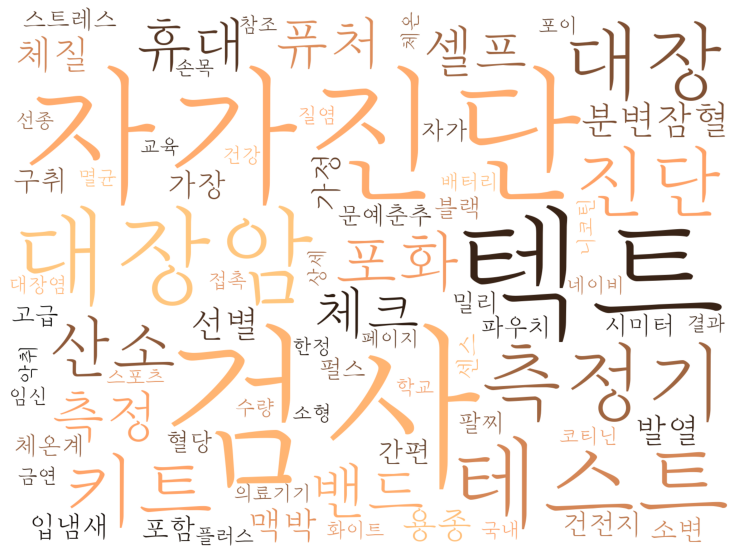

In [15]:
# 필요 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 폰트 경로 지정
path = "C:/windows/Fonts/MapoFlowerIsland.ttf"

# 빈도수에 따라 워드 클라우드 (컬러맵 스타일, 폰트 크기대로)출력
# 폰트, 배경색, 가로 세로 너비 지정  
wc = WordCloud(font_path = path, background_color = "white", colormap="copper",
width=1600, height = 1200).generate_from_frequencies(카운트2이상_딕)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

### *4-4. 코로나_쿠팡검색*

#### 1) 데이터 수집

>Page 1

In [2]:
# 필요한 라이브러리 불러오기
import requests
import urllib.request
from bs4 import BeautifulSoup

# 1페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =1
url = f"https://www.coupang.com/np/search?q=%EC%BD%94%EB%A1%9C%EB%82%98&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=1&rocketAll=false&searchIndexingToken=&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정 
res = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2 = BeautifulSoup(res.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3 = res_2.find_all("div", {"class":"descriptions-inner"})
res_3[0]

# 안에 형성되어있는 div 속 클라스 중 name요소만 찾아온다. 
res_3[0].find("div",{"class":"name"}).get_text()
res_3[1].find("div",{"class":"name"}).get_text()

# res_3으로 찾은 name요소를 가진 div속 클라스를 전부 가져와 상품 리스트를 생성해준다.
product = []
for i in range(len(res_3)):
  product.append(res_3[i].find("div",{"class":"name"}).get_text())
product

['아가페케어 살균소독제, 2개, 500ml',
 '탐사 살균 소독 스프레이 본품, 500ml, 2개',
 '아가페케어 살균소독제, 2개, 500ml',
 '무선 충전식 다쓱 소독건, 분사기 화이트',
 '[ 당일발송] 방역소독기 나노스프레이건 k5 & k5pro 무선 블루 레이 소독 분무기가있는 전기 미스트 건 기계 진드기 제거 공기 정화기 살균 램프 무선 핸드 헬드 380ml 소',
 '포원밀리언 산소포화도측정기 가정용 펄스옥시미터 FP-2, FP-2(블랙)',
 '아가페케어 살균소독제, 1개, 2L',
 '아가페케어 살균소독제, 1개, 500ml',
 '클린턴 무독성 뿌리는 천일염 코로나 소독수 살균소독제 본품500ml + 리필500ml + 서비스50ml',
 '자연그대로배어듦 모과배도라지 농축액(스틱형) 30포, 1개',
 '아가페케어 뿌리는 살균소독제 업소용, 20L, 4개',
 '세이퍼진 에어 방역 소독제 대한민국 정부 공식지정 공기소독제, 1병, 500ml',
 '하이포메디 뿌리는 살균소독제, 500ml, 2개',
 '아가페케어 뿌리는 살균소독제 4000ml + 500ml 세트, 1세트',
 '토탈클리어 안심살균 소독제 고급형 스프레이, 500ml, 3개',
 '토탈클리어 안심살균 소독제 리필 4000ml + 고급형 스프레이 500ml, 1세트',
 '토탈클리어 안심살균 소독제 리필 4000ml + 스프레이 500ml, 1세트',
 '하이포메디 뿌리는 살균소독제 4L + 500ml, 1세트',
 '코로나 소독기 가정용 방역기 셀프방역 자가격리 소독 뿌리는 소독제 무선 충전 소독스프레이 오미크론 소독건 /오후 3시 이전 주문 시 당일 발송*, 3) 소독건 + 전용 소독액 4L',
 '아가페케어 올인원 살균소독수, 1개, 4L',
 '[디볼베르] 루시드 스프레이 손소독제 에탄올 70% 500ml, 1개',
 '탐사 살균 소독 스프레이 리필 4L, 1개',
 '랩신 V3 손소독 티슈 캡형, 60매, 6팩',
 '하이포메디 뿌리는 살균소독제, 500ml,

>Page 2

In [3]:
# 필요 라이브러리 불러오기
import requests
import urllib.request
from bs4 import BeautifulSoup

# 2페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =2
url = f"https://www.coupang.com/np/search?q=%EC%BD%94%EB%A1%9C%EB%82%98&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=2&rocketAll=false&searchIndexingToken=&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정 
res_2 = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_2_2 = BeautifulSoup(res_2.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_2_3 = res_2_2.find_all("div", {"class":"descriptions-inner"})

# res_2_3으로 찾은 name요소를 가진 div속 클라스를 전부 가져와 상품 리스트2를 생성해준다.
product_2 = []
for i in range(len(res_2_3)):
  product_2.append(res_2_3[i].find("div",{"class":"name"}).get_text())
product_2

['아가페케어 살균소독제, 2개, 500ml',
 '토탈클리어 안심살균 소독제 리필 4000ml + 스프레이 500ml x 3p, 1세트',
 'Depth9 다용도 살균기 스페이스 클리너, G27클리너',
 '하이포메디 뿌리는 살균소독제, 500ml, 2개',
 '아이프리 더클린손소독티슈(에탄올), 50개입, 5개',
 '[ 당일발송] 방역소독기 나노스프레이건 k5 & k5pro 무선 블루 레이 소독 분무기가있는 전기 미스트 건 기계 진드기 제거 공기 정화기 살균 램프 무선 핸드 헬드 380ml 소',
 '산소포화도측정기 코로나 펄스옥시미터 산소포화측정기 위니즈랩, 위니즈랩 산소포화도측정기 화이트',
 '초록향기 살균 소독수 300ml 스프레이 + 2L 리필 세트, 1세트',
 '하이포메디 99.9% 살균력 인증 뿌리는소독제 살균제 살균소독제, 4리터 x 1개',
 '세이프록스 당일발송 15시마감 발송 바이러스 테스트 보유 99.9% 살균소독제 국민소독제 뿌리는소독제 올인원소독제, 1개, 4L+500ml+500ml+100ml',
 '인케어 올인원 살균 소독제 리필 4L, 1개',
 '코로나 소독약 옷에 뿌리는 소독제 테이블 분사형, (3/28부터발송)나노스프레이 소독제 1L',
 '무선소독건 자동셀프방역 코로나 살균 스프레이 휴대용소독기 사무실 학원 카페 매장 집, 무선소독기',
 '메디록스 메디록스S 4L+에어라파(공병) 살균소독제, 1개, 4L',
 '메디119 천연 살균소독제 10L코로나 예방 소독약 방역',
 '바이러스 99.999% 제거 검증 살균소독제 차아염소산(HClO 하이포염소산)수 휴대용 개인.단체 방역 안전 필수용품, 30mL50개한박스선물용',
 '식약청 허가 해호 H 깨끗한 에탄올 스프레이 손소독제 500ml 에탄올 72.5% 함유, 5개',
 '메디록스 메디록스B 4L+에어라파(공병) 살균소독제, 1개, 4L',
 '코로나 소독기 가정용 방역기 셀프방역 자가격리 소독 뿌리는 소독제 무선 충전 소독스프레이 오미크론 소독건 /오후 3시 이전

>Page 3

In [4]:
# 2페이지 url에 연결 요청하기, 응답값을 잘 받기 위해 User-Agent 값 받기
page =3
url = f"https://www.coupang.com/np/search?q=%EC%BD%94%EB%A1%9C%EB%82%98&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=3&rocketAll=false&searchIndexingToken=1=4&backgroundColor="
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

# 요청해 가져올 url, headers를 res변수로 지정 
res_3 = requests.get(url, headers=headers)

# res의 HTML으로 변환된 문서에서 BeautifulSoup를 이용해 원하는 요소를 가져온다.
res_3_2 = BeautifulSoup(res_3.text, "lxml")

# div안에 descriptions-inner요소를 가진 클라스를 전부 찾는다.
res_3_3 = res_3_2.find_all("div", {"class":"descriptions-inner"})

# res_3_3으로 찾은 name요소를 가진 div속 클라스를 전부 가져와 상품 리스트3를 생성해준다.
product_3 = []
for i in range(len(res_3_3)):
  product_3.append(res_3_3[i].find("div",{"class":"name"}).get_text())
product_3

['[나는소독제다 올인원] 정부지원 방역물품 프리미엄 살균소독제 1L 4L 20L 대용량 리필용 + 마스크스트랩, 10L',
 '뿌리는소독수 메디119 살균탈취세정 학교어린이집실내소독 (20L 10L 4L 500ml), 20L',
 '초록향기 살균 소독수 500ml 스프레이 + 4L 리필 세트, 1세트',
 '당일제조 당일발송 안심소독 세이프앤케어 20리터(kg) HOCl 미산성 차아염소산수 70~80ppm 살균.소독제 어린이집.학교.병원.요양원.유치원 방역 소독 방역완료스티커, 20리터',
 '국제인증 ISO 22000 HOCL 살균소독수 크린시드 4리터 인체무해한 가정용 뿌리는 어린이집 방역 미산성 차아염소산수',
 '시노텍스 KF94마스크 카키 앱솔루트MB 마스크 안전하고 숨쉬기 편한 사이즈 50매, KF94카키키즈용(XS) 50매',
 '탐사 KF94 고고다이노 마스크 초소형(개별포장), 1개입, 50p',
 '프리나 살균소독제, 0.5L, 1개',
 '보솔크린 코로나 살균소독제 차아염소산 뿌리는 소독제 무색 무취 무알콜 4L(+10%추가 용량)에+30ml(고급 휴대용) 무료증정!!!(4L 구입자해당)',
 '세이프샷 살균소독제 4L + 500ml, 1세트',
 '아가페케어 살균소독제, 4개, 500ml',
 '특허 바이러스 제거 차단 킬 Virus Kill 목걸이형 FDA등록 바이러스킬 어린이 회사원 우리 가족 필수템',
 '식약청 허가 해호 H 에탄올 스프레이 500ml 에탄올 83% 함유, 5개',
 '페르바도 칙 베이비 어린이 전용 살균 소독제, 500ml, 1개',
 '초록향기 피톤치드 살균소독수 스프레이 500ml + 리필 2L, 1세트',
 '토탈클리어 안심살균 소독제 리필 4000ml + 고급형 스프레이 500ml x 3p, 1세트',
 '온숨 KF99 프리미엄 대형 황사 마스크 화이트 30매',
 '사탄웨이 편리한 무선핸디형 방역소독기, 흰색',
 '아이코코 황사방역용 마스크 소형 L KF94, 1개입, 100개, 화이트',
 '[박스포

In [5]:
# 형태소 분석을 위해 상품1,2,3 합쳐서 텍스트 파일로 저장(코드 입력시 오류로 직접 에디터로 저장)
covid = product + product_2 + product_3
covid

['아가페케어 살균소독제, 2개, 500ml',
 '탐사 살균 소독 스프레이 본품, 500ml, 2개',
 '아가페케어 살균소독제, 2개, 500ml',
 '무선 충전식 다쓱 소독건, 분사기 화이트',
 '[ 당일발송] 방역소독기 나노스프레이건 k5 & k5pro 무선 블루 레이 소독 분무기가있는 전기 미스트 건 기계 진드기 제거 공기 정화기 살균 램프 무선 핸드 헬드 380ml 소',
 '포원밀리언 산소포화도측정기 가정용 펄스옥시미터 FP-2, FP-2(블랙)',
 '아가페케어 살균소독제, 1개, 2L',
 '아가페케어 살균소독제, 1개, 500ml',
 '클린턴 무독성 뿌리는 천일염 코로나 소독수 살균소독제 본품500ml + 리필500ml + 서비스50ml',
 '자연그대로배어듦 모과배도라지 농축액(스틱형) 30포, 1개',
 '아가페케어 뿌리는 살균소독제 업소용, 20L, 4개',
 '세이퍼진 에어 방역 소독제 대한민국 정부 공식지정 공기소독제, 1병, 500ml',
 '하이포메디 뿌리는 살균소독제, 500ml, 2개',
 '아가페케어 뿌리는 살균소독제 4000ml + 500ml 세트, 1세트',
 '토탈클리어 안심살균 소독제 고급형 스프레이, 500ml, 3개',
 '토탈클리어 안심살균 소독제 리필 4000ml + 고급형 스프레이 500ml, 1세트',
 '토탈클리어 안심살균 소독제 리필 4000ml + 스프레이 500ml, 1세트',
 '하이포메디 뿌리는 살균소독제 4L + 500ml, 1세트',
 '코로나 소독기 가정용 방역기 셀프방역 자가격리 소독 뿌리는 소독제 무선 충전 소독스프레이 오미크론 소독건 /오후 3시 이전 주문 시 당일 발송*, 3) 소독건 + 전용 소독액 4L',
 '아가페케어 올인원 살균소독수, 1개, 4L',
 '[디볼베르] 루시드 스프레이 손소독제 에탄올 70% 500ml, 1개',
 '탐사 살균 소독 스프레이 리필 4L, 1개',
 '랩신 V3 손소독 티슈 캡형, 60매, 6팩',
 '하이포메디 뿌리는 살균소독제, 500ml,

#### 2) 형태소 분석 및 전처리

In [6]:
# 저장한 텍스트 파일 불러오기 및 읽기
with open("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트1/영양미/분석용파이썬코드_쿠팡코로나검색결과.txt") as f:     #경로
  text = f.read()
# 불필요한 띄어쓰기, 괄호 공백 처리하기
text_1 = text.replace('\n','')
text_2 = text_1.replace("(","")
covid_120 = text_2.replace(")","") 
covid_120

"['Depth9 다용도 살균기 스페이스 클리너, G27클리너', '탐사 살균 소독 스프레이 본품, 500ml, 2개', '하이포메디 뿌리는 살균소독제, 500ml, 2개', '무선 충전식 다쓱 소독건, 분사기 화이트', '[ 당일발송] 방역소독기 나노스프레이건 k5 & k5pro 무선 블루 레이 소독 분무기가있는 전기 미스트 건 기계 진드기 제거 공기 정화기 살균 램프 무선 핸드 헬드 380ml 소', '질편한 3 in 1 질염 테스트기 셀프질염테스트, 한정수량특가 1개, -', '자연그대로배어듦 모과배도라지 농축액스틱형 30포, 1개', '아가페케어 살균소독제, 2개, 500ml', '포원밀리언 산소포화도측정기 가정용 펄스옥시미터 FP-2, FP-2블랙', '토탈클리어 안심살균 소독제 고급형 스프레이, 500ml, 3개', '리빙블리 가정용 미니 무선 충전식 나노 스프레이 방역 소독기 LV-11', '세이퍼진 에어 방역 소독제 대한민국 정부 공식지정 공기소독제, 1병, 500ml', '탐사 살균 소독 스프레이 본품 + 리필, 1개', '[아침과저녁] 페이스 쉴드 30개입', '조아제약 면역칸 마시는 약국용 면역력 영양제 아연 징크 베타글루칸 맥주효모 20ml, 30포1박스 + 헬시링크 마스크1팩', '탐사 살균 소독 스프레이 리필 4L, 1개', '[디볼베르] 루시드 스프레이 손소독제 에탄올 70% 500ml, 1개', '코멧 KF94 보건마스크 새부리형 2단접이 대형, 5개입, 20개, 화이트', '하이포메디 뿌리는 살균소독제 4L + 500ml, 1세트', '자연그대로배어듦 생강배도라지 농축액스틱형, 30포', '아가페케어 살균소독제, 1개, 500ml', '아가페케어 올인원 살균소독수, 1개, 4L', '탐사 KF94 마스크 새부리형 2단접이 대형, 100개입, 1개, 화이트', '코멧 KF94 보건마스크 새부리형 2단접이 대형, 5개입, 20개, 블랙', '랩신 V3 손소독 티슈 캡형, 60매, 6팩', '토탈클리어 안심살균 소독제 리필 4000ml

In [7]:
# 형태소 분석기Okt.nouns를 사용해 명사로 쪼갠 것을 covid_120 변수로 지정
# !pip install konlpy
from konlpy.tag import Okt
okt = Okt()
covid_n = okt.nouns(covid_120)
covid_n

# 불용어 제거 (조사빼기)
코로나쿠팡조사뺀명사 = []
for word in covid_n:
  if len(word) > 1 :
    코로나쿠팡조사뺀명사.append(word)

코로나쿠팡조사뺀명사

['다용',
 '살균',
 '기',
 '스페이스',
 '클리',
 '너',
 '클리',
 '너',
 '탐사',
 '살균',
 '소독',
 '스프레이',
 '품',
 '개',
 '하이포',
 '살균',
 '소독제',
 '개',
 '무선',
 '충전',
 '쓱',
 '소독',
 '건',
 '분사기',
 '화이트',
 '당일',
 '발송',
 '방역',
 '소독기',
 '나노',
 '스프레이',
 '건',
 '무선',
 '블루',
 '레이',
 '소독',
 '분무기',
 '전기',
 '미스트',
 '건',
 '기계',
 '진드기',
 '제거',
 '공기',
 '정화',
 '기',
 '살균',
 '램프',
 '무선',
 '핸드',
 '헬드',
 '소',
 '질',
 '질염',
 '테스트',
 '기',
 '셀프',
 '질염',
 '테스트',
 '한정',
 '수량',
 '특',
 '개',
 '자연',
 '그대로',
 '모과',
 '농축액',
 '스틱',
 '포',
 '개',
 '아가페',
 '케어',
 '살균',
 '소독제',
 '개',
 '포',
 '밀리',
 '산소',
 '포화',
 '측정기',
 '가정',
 '용',
 '펄스',
 '옥',
 '시미터',
 '블랙',
 '토탈',
 '클리어',
 '안심',
 '살균',
 '소독제',
 '고급',
 '스프레이',
 '개',
 '리빙블리',
 '가정',
 '용',
 '미니',
 '무선',
 '충전',
 '나노',
 '스프레이',
 '방역',
 '소독기',
 '세이',
 '에어',
 '방역',
 '소독제',
 '대한민국',
 '정부',
 '공식',
 '지정',
 '공기',
 '소독제',
 '병',
 '탐사',
 '살균',
 '소독',
 '스프레이',
 '품',
 '리필',
 '개',
 '아침',
 '저녁',
 '페이스',
 '쉴드',
 '개입',
 '제약',
 '면역',
 '칸',
 '약국',
 '용',
 '면역',
 '양제',
 '아연',
 '징',
 '베타',
 '글루칸',
 '맥주',
 '효모',
 '포',
 '박스'

In [9]:
# 조사뺀명사 리스트에 있는 각 단어의 빈도수 나타내기
from collections import Counter
코로나쿠팡조사뺀명사_count = Counter(코로나쿠팡조사뺀명사)
코로나쿠팡조사뺀명사_count

Counter({'다용': 4,
         '살균': 56,
         '스페이스': 3,
         '클리': 6,
         '탐사': 4,
         '소독': 19,
         '스프레이': 26,
         '하이포': 5,
         '소독제': 56,
         '무선': 19,
         '충전': 6,
         '분사기': 2,
         '화이트': 8,
         '당일': 9,
         '발송': 12,
         '방역': 18,
         '소독기': 16,
         '나노': 9,
         '블루': 3,
         '레이': 3,
         '분무기': 6,
         '전기': 3,
         '미스트': 3,
         '기계': 3,
         '진드기': 3,
         '제거': 6,
         '공기': 5,
         '정화': 3,
         '램프': 3,
         '핸드': 3,
         '헬드': 3,
         '질염': 6,
         '테스트': 8,
         '셀프': 6,
         '한정': 3,
         '수량': 3,
         '자연': 2,
         '그대로': 2,
         '모과': 1,
         '농축액': 2,
         '스틱': 2,
         '아가페': 7,
         '케어': 11,
         '밀리': 1,
         '산소': 6,
         '포화': 6,
         '측정기': 7,
         '가정': 11,
         '펄스': 4,
         '시미터': 4,
         '블랙': 4,
         '토탈': 5,
         '클리어': 5,
         '안심': 6,

In [11]:
# 불용어 제거(각 단어 빈도수가 3이상인 것만 출력)
카운트3이상 = {}
for word, count in 코로나쿠팡조사뺀명사_count.items():
    if count > 3:
        카운트3이상[word] = count
    카운트3이상

# 카운트3이상중 체온계, 온도계 제거(상품명이기 때문에 불필요)
카운트3이상_딕 = dict(카운트3이상)
del 카운트3이상_딕['코로나']
카운트3이상_딕

{'다용': 4,
 '살균': 56,
 '클리': 6,
 '탐사': 4,
 '소독': 19,
 '스프레이': 26,
 '하이포': 5,
 '소독제': 56,
 '무선': 19,
 '충전': 6,
 '화이트': 8,
 '당일': 9,
 '발송': 12,
 '방역': 18,
 '소독기': 16,
 '나노': 9,
 '분무기': 6,
 '제거': 6,
 '공기': 5,
 '질염': 6,
 '테스트': 8,
 '셀프': 6,
 '아가페': 7,
 '케어': 11,
 '산소': 6,
 '포화': 6,
 '측정기': 7,
 '가정': 11,
 '펄스': 4,
 '시미터': 4,
 '블랙': 4,
 '토탈': 5,
 '클리어': 5,
 '안심': 6,
 '리필': 11,
 '개입': 5,
 '박스': 6,
 '마스크': 14,
 '손소독제': 4,
 '에탄올': 5,
 '부리': 5,
 '대형': 5,
 '세트': 16,
 '올인원': 7,
 '독수': 5,
 '체리': 4,
 '가능': 4,
 '용량': 5,
 '휴대': 6,
 '바이러스': 6,
 '오미크론': 7,
 '록스': 4,
 '세이프': 5,
 '숨쉬기': 4,
 '소용': 4,
 '역기': 6,
 '국내': 4}

#### 3) 시각화


> 막대 그래프

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
None


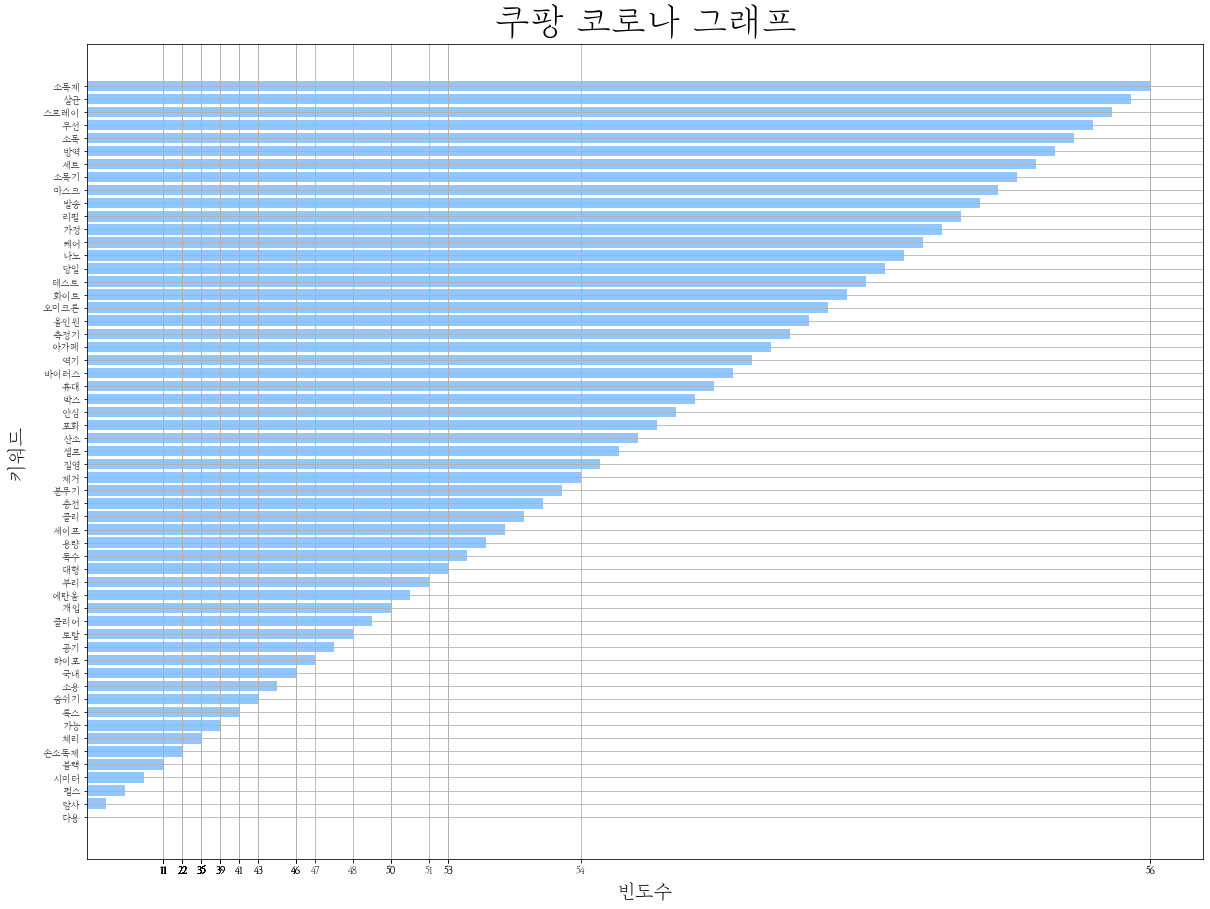

In [12]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available) # 그래프 스타일 확인하기
print(plt.style.use('seaborn-pastel'))

# 폰트 설정ㅇ ,. 
plt.rc("font",family="MapoFlowerIsland")

# 그래프 전체 사이즈 및 제목 설정
plt.figure(figsize = (20, 15))
plt.title("쿠팡 코로나 그래프", fontsize=37)

# xlabel/ylabel 이름,폰트,여백 설정
plt.xlabel("빈도수", fontsize=20, labelpad=5)
plt.ylabel("키워드", fontsize=20, labelpad=15)
plt.grid()

# x/y축에 들어갈 데이터 변수 지정
정렬된명사들 = sorted(카운트3이상_딕,key=카운트3이상_딕.get)
정렬된값들 = sorted(카운트3이상_딕.values())

#세로 막대 그래프
# plt.bar(range(len(정렬된명사들)),정렬된값들, align = "center") 
# plt.xticks(range(len(정렬된명사들)),정렬된명사들, rotation = 75) 

#가로 막대 그래프
plt.barh(정렬된명사들,(range(len(정렬된값들))), align="center") 
plt.xticks(정렬된값들,(range(len(정렬된명사들))) , rotation=0)
plt.show() 

> 워드 클라우드

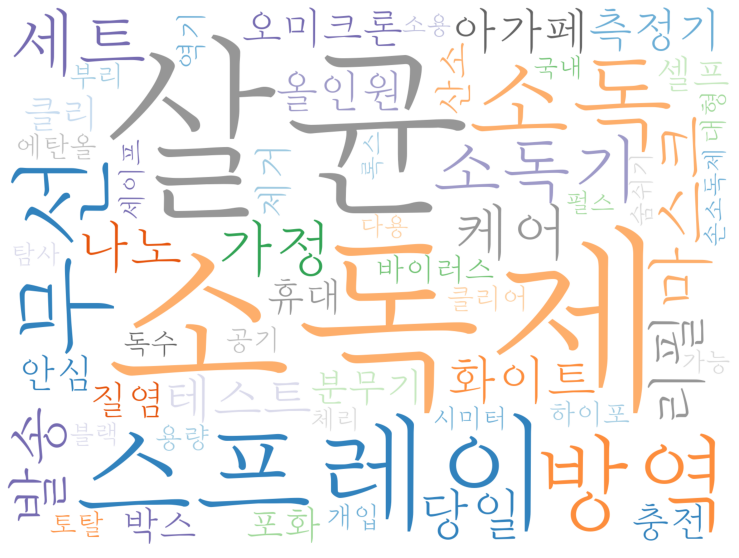

In [13]:
# 필요한 라이브러리 불러오기
from wordcloud import WordCloud
path = "C:/windows/Fonts/MapoFlowerIsland.ttf"

# 빈도수에 따라 워드 클라우드 (컬러맵 스타일, 폰트 크기대로)출력
# 폰트, 배경색, 가로 세로 너비 지정  
wc = WordCloud(font_path = path, background_color = "white", colormap="tab20c",
width=1600, height = 1200).generate_from_frequencies(카운트3이상_딕)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

### *4-5. 코로나_네이버기사검색*

#### 1) 데이터 수집

In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import requests 
import os
import re
from datetime import datetime

In [ ]:
date = str(datetime.now())
date = date[:date.rfind(':')].replace(' ',  '-')
date = date.replace(':', '시') + '분'

query = input('뉴스 검색 키워드 입력 :')
query = query.replace(' ', '+')

news_num = int(input('크롤링 데이터 개수 입력:'))

#크롤링 페이지 설정
news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'

#뉴스 검색 키워드 넣어서 get요청
req = requests.get(news_url.format(query))
soup = BeautifulSoup(req.text, 'html.parser')
news_dict = {}
idx = {}

#크롤링 데이터 양이 뉴스 한 페이지 개수보다 많으면 다음 페이지로 넘어가기 
cur_page = 1

news_dict = {}
idx = {}

cur_page = 1

In [ ]:
print('크롤링 시작')

while idx< news_num:
    table = soup.find('ul', {'class':'list_news'})
    li_list = table.find_all('li',{'id': re.compile('sp_nws')})
    area_list = [li.find('div', {'class':'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class':'news_tit'})for area in area_list]

    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title':n.get('title'),
                         'url':n.get('href')}
        idx += 1

cur_page += 1
pages = soup.find('div',{'class':'sc_page_inner'})
next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)] [0].get('herf')

req = requests.get('https://search.naver.com/search.naver' + next_page_url)
soup = BeautifulSoup(req.text, 'html.parser')

# ------ 출력 결과 ------------
# 뉴스 검색 키워드 입력: 코로나
# 크롤링 데이터 개수 입력 : 50
# 크롤링 시작 

In [ ]:
# 데이터 프레임 생성 및 파일 저장하기
news_dict

news_df = pd.DataFrame(news_dict).T
news_df

news.to_csv('C:/Users/minak/OneDrive/바탕화면/프로젝트/미니 프로젝트1/영양미/news.csv', encoding='utf8', index=False)

#### 2) 형태소 분석 및 전처리

In [ ]:
# 파일 불러오기 및 읽기
from konlpy.tag import Okt
with open("C:/Users/minak/OneDrive/바탕화면/프로젝트/미니 프로젝트1/영양미/news.csv") as f:
    text = f.read()
text

In [ ]:
# 형태소 분석기Okt.nouns를 사용해 명사로 쪼갠 것을 naver_news_n 변수로 지정
# !pip install konlpy
from konlpy.tag import Okt
okt = Okt()
naver_news_n = okt.nouns(text)
naver_news_n

# 불용어 제거 (조사빼기)
네이버조사뺸명사 = []
for word in covid_n:
  if len(word) > 1 :
    네이버조사뺸명사.append(word)

네이버조사뺸명사

In [ ]:
# 조사 뺀 명사  
from collections import Counter
네이버조사뺸명사_count = Counter(네이버조사뺀명사)
네이버조사뺸명사_count

# 빈도수 1이상의 단어 추출하기
카운트1이상 = {}
for word, count in 네이버조사뺸명사_count.items():
    if count > 1:
        카운트1이상[word] = count
    카운트1이상

#### 3) 시각화

> 워드 클라우드

In [ ]:
#필요한 라이브러리 불러오기 및 폰트 지정
import matplotlib.pyplot as plt
from wordcloud import WordCloud
path = "C:/windows/Fonts/MapoFlowerIsland.ttf"

# 불용어 제거(각 단어 빈도수가 1이상인 것만 출력)
카운트1이상_딕 = dict (카운트1이상)
del 카운트1이상_딕("코로나")
카운트1이상_딕

# 빈도수에 따라 워드 클라우드 (컬러맵 스타일, 폰트 크기대로)출력
# 폰트, 배경색, 가로 세로 너비 지정  
wc = WordCloud(font_path=path, background_color="white", width=1600, height=1200).generate_from_frequencies(카운트1이상_딕)
plt.imshow(wc)
plt.axis("off")
plt.show()

### **결론**

##### 동적 데이터를 크롤링한 것으로 진행 당시 데이터가 오류가 생겨 당시 결과(이미지, 자료들을 바탕으로)와 현재 데이터를 다시 크롤링해 결과를 비교 및 재분석했습니다.
### **Before**

##### 마스크 
- 최다 연관 검색어: 무채색의 색상(검정, 하얀색), 황사, 방역, 소형, 대형 등
- 소형보다 대형 마스크가 수요량에서 극명한 차이가 보여 아이보다 어른의 활동량이 더 높음을 알 수 있었습니다
- 이외에도 적지만 불투명한 컬러들과 마스크의 모양이 편한 핏을 찾는 소비자들도 있어서 코로나 장기화가 이어진다면 다양한 컬러의 마스크 매출이 많아질 것으로 예상했습니다.

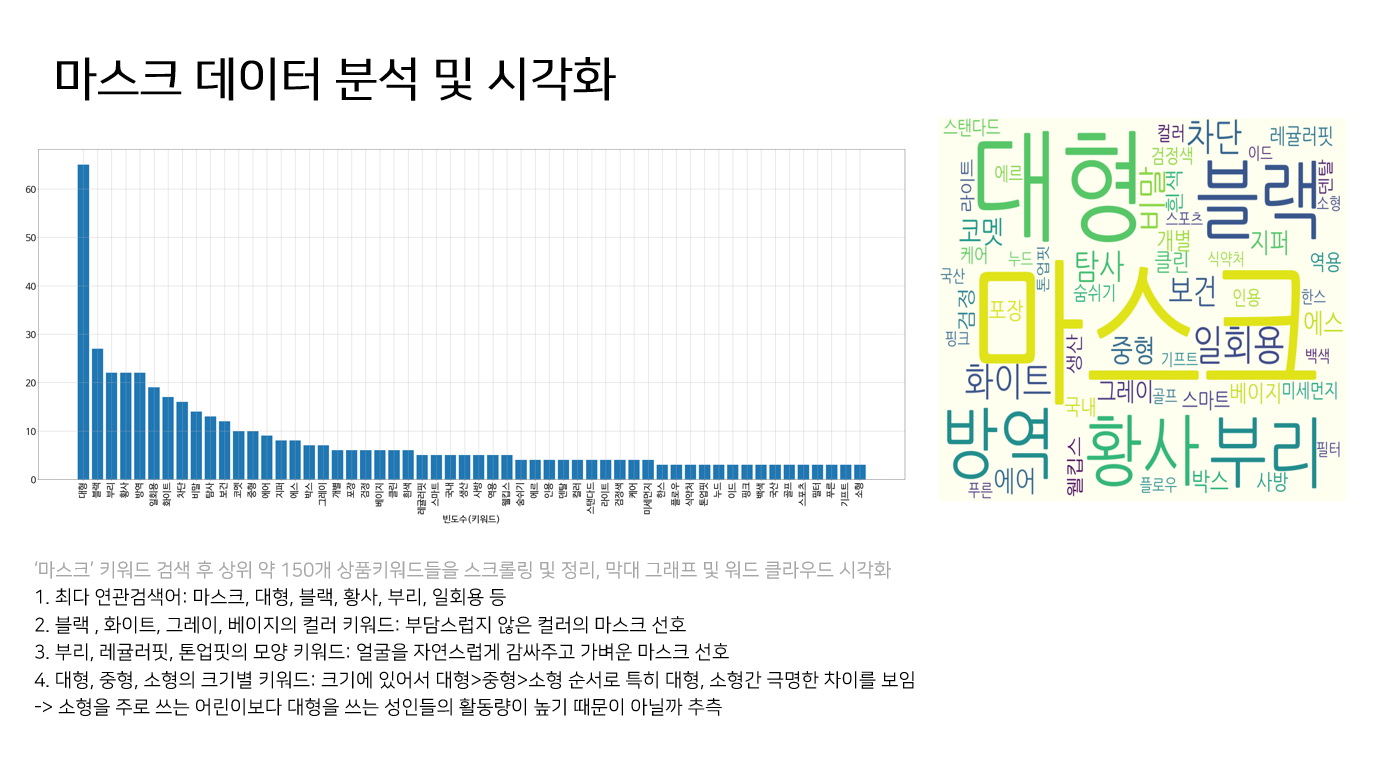

In [1]:
from IPython.display import Image
Image("mask_data.png")

##### 비접촉 체온계 
- 최다 연관 검색어_적외선, 측정기, 자동, 발열등
- 삼각대, 스탠드 키워드: 기업이나 단체 등 사람의 활동이 많은 곳에서 많이 사용. 시간이 더 지나 코로나가 안정화되고 백신 접종이 완료되면 수요가 줄어들 것이라 예상하였습니다.

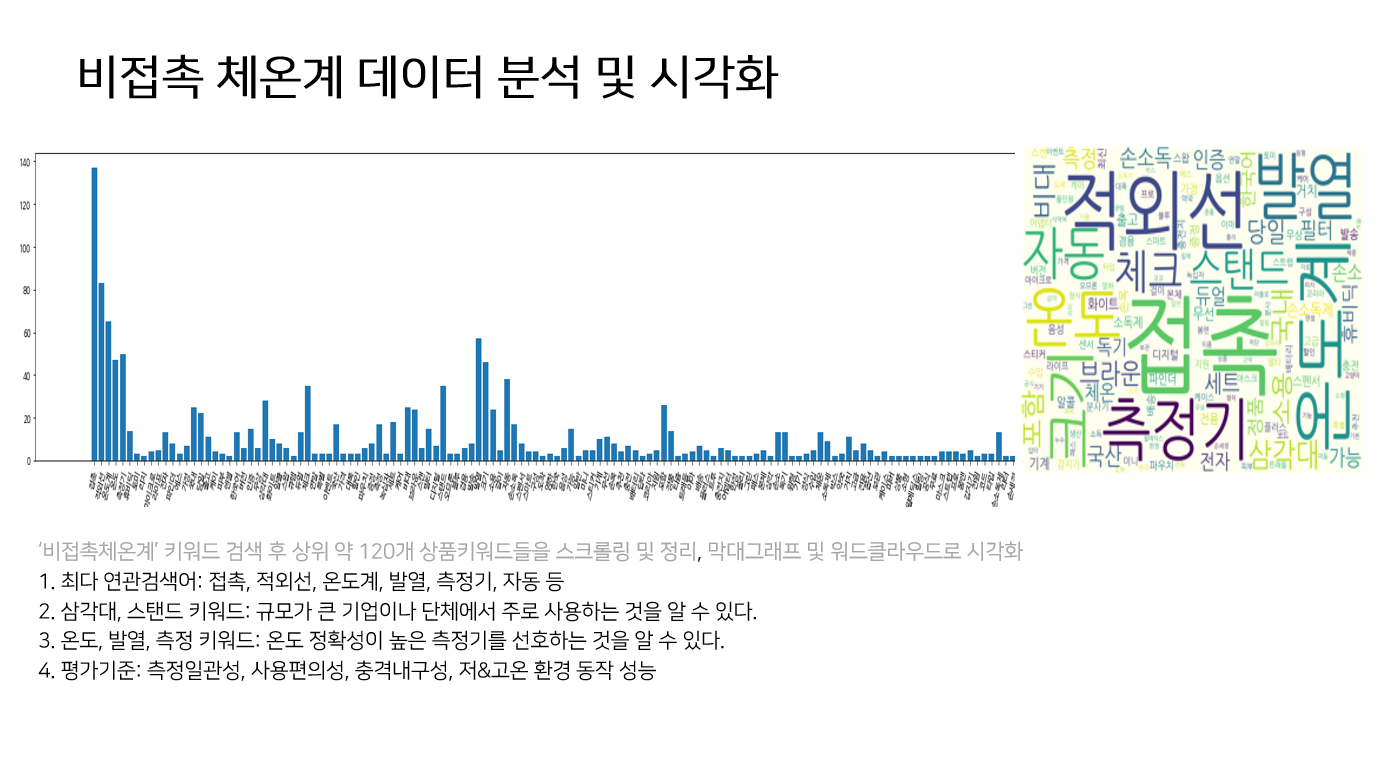

In [2]:
Image("Thermometer_data.png")

##### 자가진단키트
- 최다 연관 검색어:코로나, 센서, 자가진단, 검사, 특정 브랜드 이름(휴마시스)등
- 가장 판매율이 높은 키트 브랜드: 휴마시스, 래피젠
- 트러스트, 인증, 식약처, 정품 -> 해당 브랜드 키트를 구입한 소비자들의 상품 선정 기준이 신뢰성, 안전성임을 알 수 있었습니다.

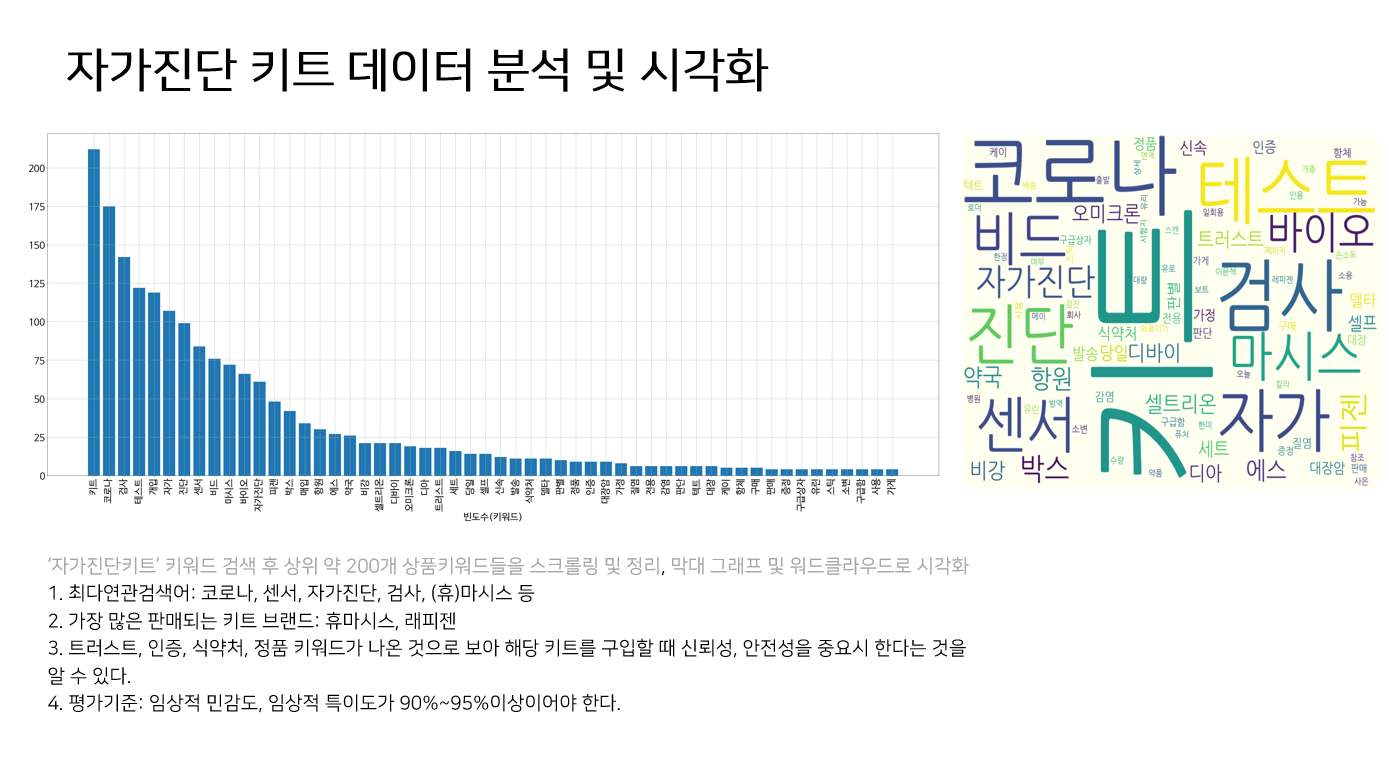

In [3]:
Image("Self-Jindan_data.png")

##### 코로나 검색 결과
- 마스크, 자가진단키트, 비접촉체온계의 수요, 검색량이 높을 것이라 예상했지만 키트, 자가, 검사, 테스트 등의 연관 검색어가 많았습니다.
    => 돌파감염이 증가하고 거리두기의 장기화로 초반의 마스크 대란이 시들해지면서 자가에서 검사를 진행하는 방식을 선호하게 됨을 알 수 있었습니다.

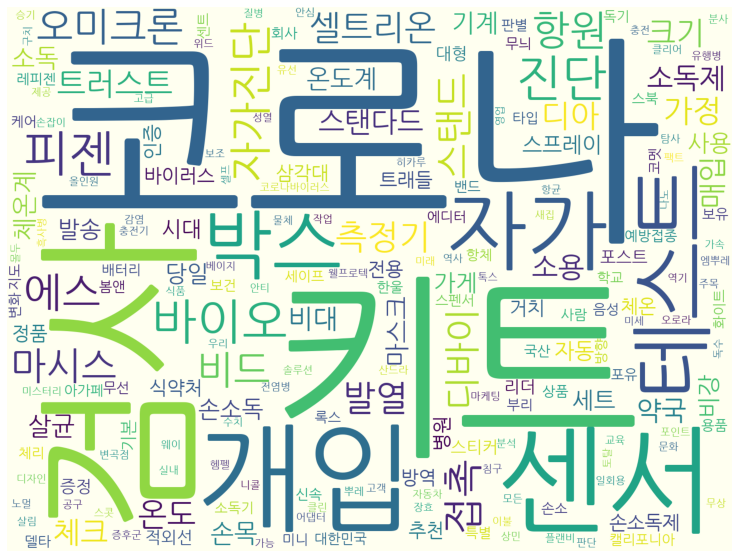

In [4]:
Image("covid3.png")

### **After**

- 마스크나 비접촉 체온계는 비슷한 결과가 나왔지만 자가진단키트는 '코로나'보다 '오미크론'단어를 포함해야 관련 검색어량이 많았습니다.
- '코로나' 검색 결과 경제, 후유증, 키트 관련 단어가 최다 연관 검색어로 나타나, 현재 확진자 수가 이미 일일히 규제할 수 없는 정도를 넘어서
자발적으로 거리두기와 자가진단을 하는 상황을 엿볼 수 있었습니다.